In [1]:
from __future__ import division

import requests
from itertools import chain
from collections import defaultdict, OrderedDict
import urllib
import sys
import os
import copy
from shutil import copy2
from PIL import Image
import pickle
import random
import shutil
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import time
import seaborn as sns
import pandas as pd
from datetime import datetime, date
from joblib import Parallel, delayed

In [2]:
imgs = {}
with open('100000_imgs.pkl') as imgs_file:
    imgs = pickle.load(imgs_file)
    
images_done = set()
with open('images_done.pkl') as images_done_file:
    images_done = pickle.load(images_done_file)

In [3]:
headers = {'Accept': '*/*', 
           'X-Requested-With': 'XMLHttpRequest', 
           'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) '
             'AppleWebKit/601.1.46 (KHTML, like Gecko) '
           'Version/9.0 Mobile/13B143 Safari/601.1', 
           'referer': 'https://www.instagram.com/', 
           'Accept-Language': 'ru,en;q=0.8',
           'x-csrftoken': '*********************',
           'cookie': 'csrftoken=**************************;',
           'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
}

In [4]:
def get_info_by_id(user_id, count=100):
    data = ('q=ig_user({})%20%7B%20'
            'media.after(0%2C%20{})%20%7B%0A%20%20count%2C%0A%20%20'
            'nodes%20%7B%0A%20%20%20%20'
            'caption%2C%0A%20%20%20%20'
            'code%2C%0A%20%20%20%20'
            'id%2C%0A%20%20%20%20'
            'comments%20%7B%0A%20%20%20%20%20%20count%0A%20%20%20%20%7D%2C%0A%20%20%20%20'
            'date%2C%0A%20%20%20%20'
#             'dimensions%20%7B%0A%20%20%20%20%20%20'
#             'height%2C%0A%20%20%20%20%20%20width%0A%20%20%20%20%7D%2C%0A%20%20%20%20'
#             'display_src%2C%0A%20%20%20%20id%2C%0A%20%20%20%20
            'is_video%2C%0A%20%20%20%20'
            'likes%20%7B%0A%20%20%20%20%20%20count%0A%20%20%20%20%7D%2C%0A%20%20%20%20'
            'owner%20%7B%0A%20%20%20%20%20%20'
            'id%2C%0A%20%20%20%20%20%20'
            'username%2C%0A%20%20%20%20%20%20%20%20%20%20'
            'follows%20%7B%0A%20%20%20%20%20%20count%0A%20%20%20%20%7D%2C'
            'followed_by%20%7B%0A%20%20%20%20%20%20count%0A%20%20%20%20%7D%2C'
            'full_name%2C%0A%20%20%20%20%20%20'
            'profile_pic_url%0A%20%20%20%20%7D%2C%0A%20%20%20%20'
            'thumbnail_src%2C%0A%20%20%20%20video_views%0A%20%20%7D%2C%0A%20%20'
            'page_info%0A%7D%0A%20%7D'
           ).format(user_id, count)

    r = requests.post('https://www.instagram.com/query/',
                      headers=headers,
                      data=data)
    return r.json()

In [10]:
def get_likes_from_info(input_json):
    info_likes = []
    for node in input_json[u'media'][u'nodes']:
        if node[u'is_video']:
            continue
        info_likes.append([node[u'likes'][u'count'], node[u'owner'][u'followed_by'][u'count'], node[u'date']])
    return info_likes

In [5]:
# location

ny_users = set()
max_id = ''
has_next_page = True
while has_next_page and len(ny_users) < 1000:
    print len(ny_users), 
    resp = requests.get('https://www.instagram.com/explore/locations/'
                        '212988663/new-york-new-york/?__a=1{}'.format(max_id), 
                        headers=headers).json()
    location_dict = resp[u'location']
    for node in location_dict[u'media'][u'nodes']:
        ny_users.add(node[u'owner'][u'id'])

    if location_dict[u'media'][u'page_info'][u'has_next_page']:
        max_id = '&max_id=' + location_dict[u'media'][u'page_info'][u'end_cursor']
    else:
        has_next_page = False

# with open('ny_users.pkl', 'wb') as ny_users_file:
#     pickle.dump(ny_users, ny_users_file, 2)

0 24 41 62 82 99 117 140 161 181 202 224 244 265 289 312 334 351 371 391 415 438 457 478 501 523 544 564 584 605 625 647 666 686 706 724 742 762 781 801 817 834 851 868 888 910 929 948 963 981 996

AttributeError: 'list' object has no attribute 'write'

In [27]:
user_likes = []
for user_id in ny_users:
    print len(user_likes),
#     try:
    json_info = get_info_by_id(user_id)
#     except:
#         continue
    user_likes += get_likes_from_info(json_info)
    
# with open('ny_user_likes.pkl', 'wb') as ny_user_likes_file:
#     pickle.dump(user_likes, ny_user_likes_file, 2)

0 91 172 262 361 437 474 569 660 760 860 953 994 1090 1102 1186 1284 1371 1470 1569 1666 1761 1860 1940 1979 2069 2167 2267 2352 2430 2482 2579 2600 2670 2721 2807 2887 2913 2997 3097 3197 3297 3397 3467 3557 3622 3634 3636 3727 3779 3879 3962 4054 4153 4253 4341 4423 4434 4506 4569 4666 4740 4831 4923 4956 4985 5085 5094 5170 5220 5257 5356 5446 5454 5469 5569 5664 5759 5853 5953 5994 6091 6128 6190 6290 6387 6484 6584 6660 6751 6832 6913 6989 7088 7187 7258 7274 7371 7422 7497 7552 7652 7744 7840 7940 7983 8083 8093 8193 8287 8290 8390 8402 8496 8596 8680 8779 8879 8964 8984 9047 9138 9202 9302 9311 9402 9460 9525 9563 9648 9743 9843 9859 9952 10034 10093 10186 10212 10247 10335 10431 10452 10551 10649 10743 10835 10839 10939 11034 11071 11143 11190 11202 11302 11326 11380 11450 11549 11623 11663 11753 11834 11929 12029 12124 12176 12259 12358 12451 12547 12634 12729 12821 12921 12948 13003 13088 13090 13185 13285 13385 13482 13582 13676 13776 13873 13932 14032 14124 14221 14321 1441

In [87]:
user_likes_np = np.array(user_likes)
df = pd.DataFrame({'hours_passed': (1496402869 - user_likes_np[:,2]) / 60 / 60,
                   'timestamp': user_likes_np[:,2],
                   'likes_density': user_likes_np[:,0] / (user_likes_np[:,1] + 0.0001),
                   'likes_count': user_likes_np[:,0]})
df['hours_passed_int'] = df['hours_passed'].map(lambda x: int(x))
df['days_passed_int'] = df['hours_passed'].map(lambda x: int(x / 24) )
df = df[df['hours_passed'] < 30 * 24]
df = df[df['likes_density'] < 0.5]
df = df[df['likes_count'] < 400]

In [88]:
df2 = df[(df['days_passed_int'] < 23) & (df['days_passed_int'] > 7)]

In [95]:
df2['hour'] = df2['timestamp'].map(lambda x: (datetime.utcfromtimestamp(x).hour - 4) % 24)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
df2['hour'].value_counts(normalize=True)
# plt.show()

7     0.075441
6     0.072944
8     0.064597
9     0.058667
10    0.051646
12    0.048916
18    0.048291
13    0.045951
15    0.045639
16    0.044937
19    0.044859
5     0.044859
20    0.044625
11    0.044001
14    0.043611
17    0.043064
21    0.036901
22    0.033391
23    0.024419
4     0.020362
0     0.018880
3     0.015993
1     0.014511
2     0.013497
Name: hour, dtype: float64

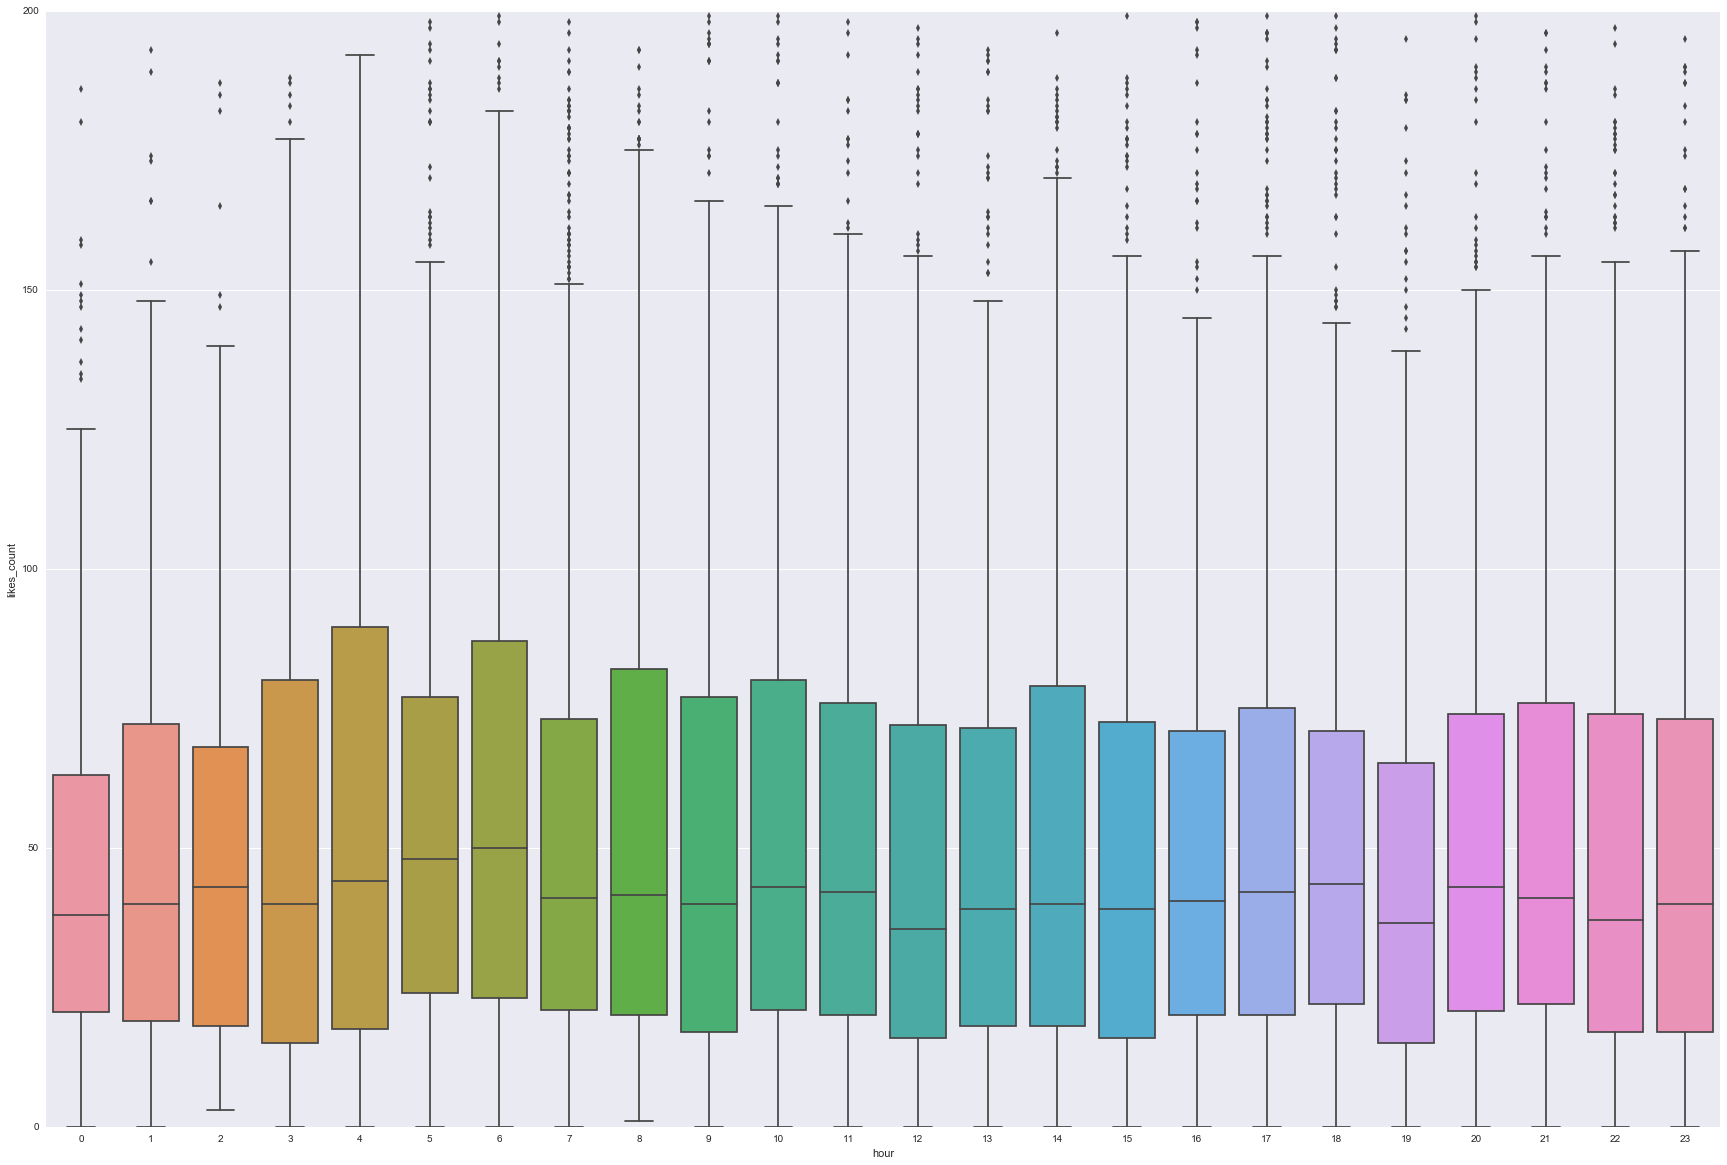

In [108]:
plt.figure(figsize=(30, 20))
sns.boxplot(x='hour', y='likes_count', data=df2[df2['likes_count'] < 200], )
plt.show()

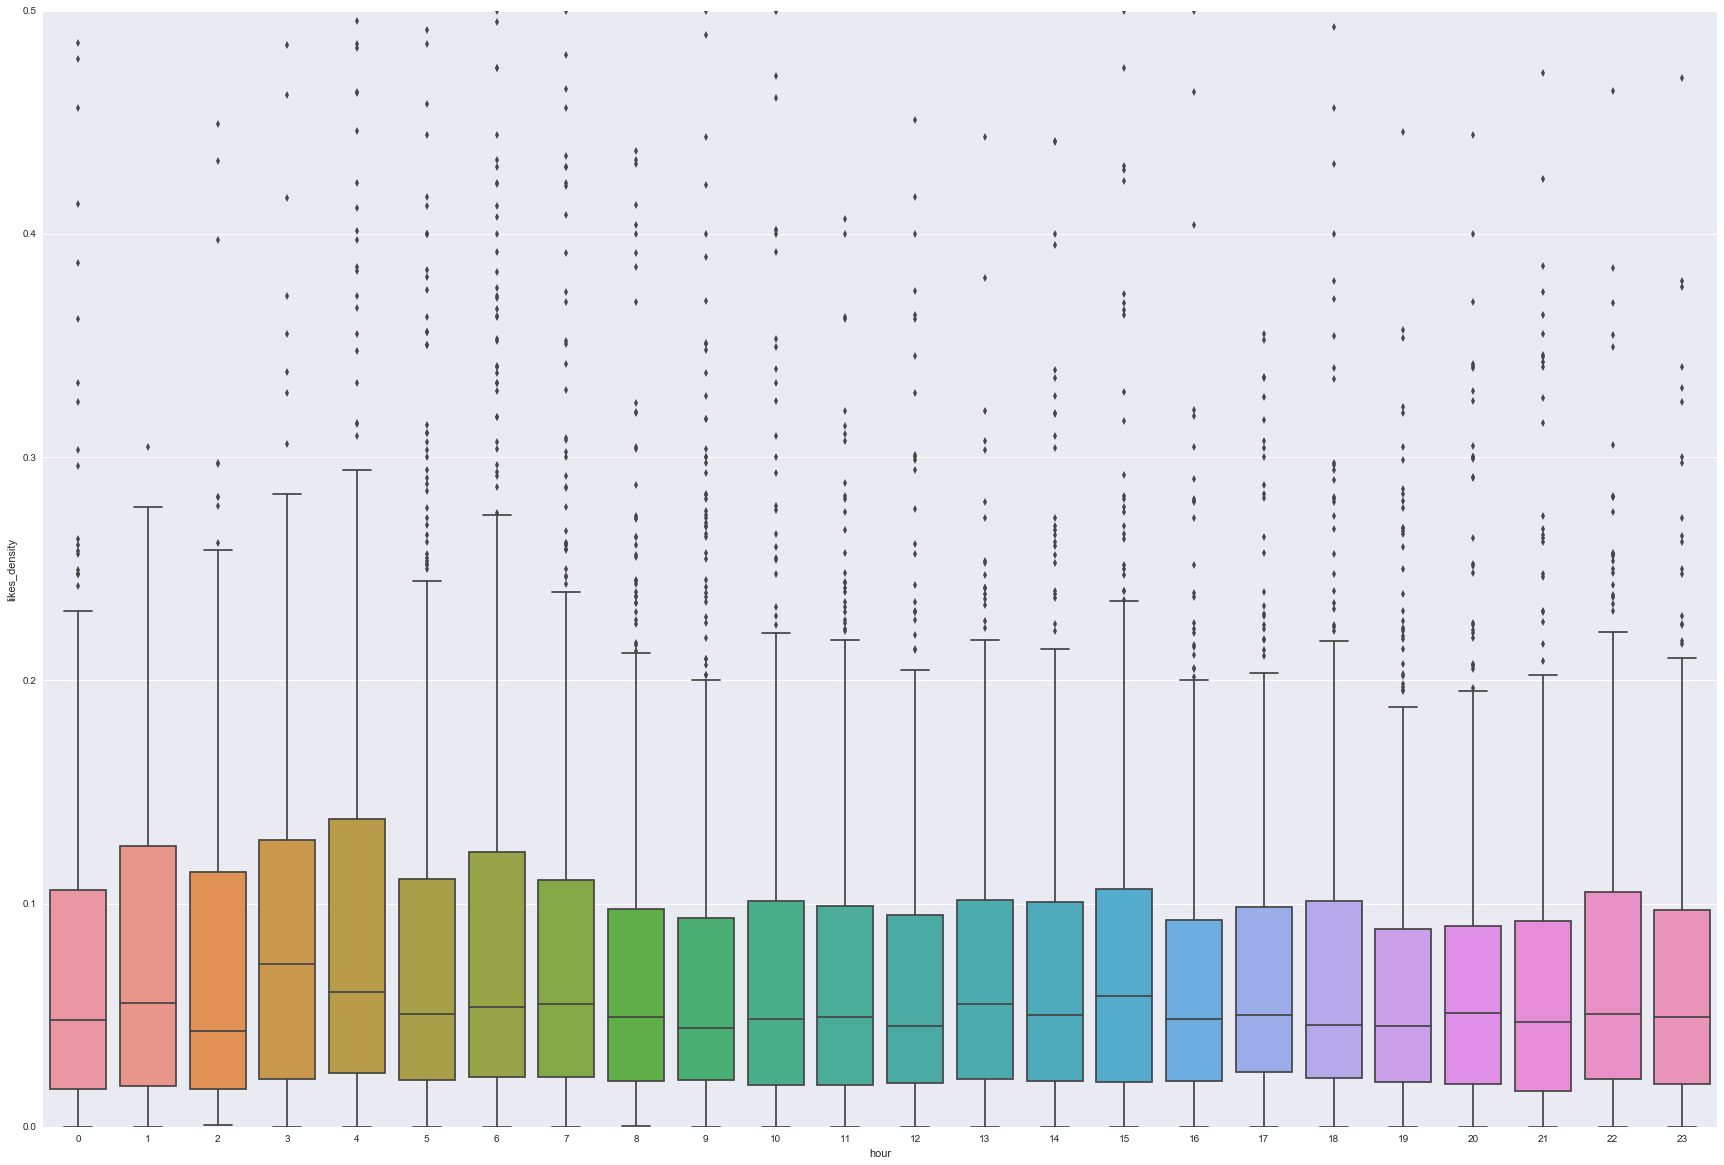

In [109]:
plt.figure(figsize=(30, 20))
sns.boxplot(x='hour', y='likes_density', data=df2[df2['likes_count'] < 200], )
plt.show()

In [64]:
mean_density = []
for day in xrange(30):
    mean_density.append(df[df['days_passed_int'] == day]['likes_density'].median())

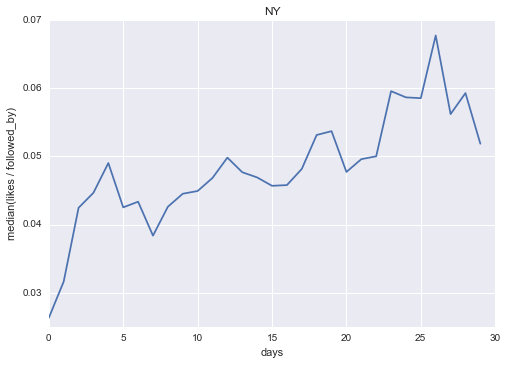

In [71]:
plt.plot(mean_density)
plt.title('NY')
plt.xlabel('days')
plt.ylabel('median(likes / followed_by)')
plt.show()

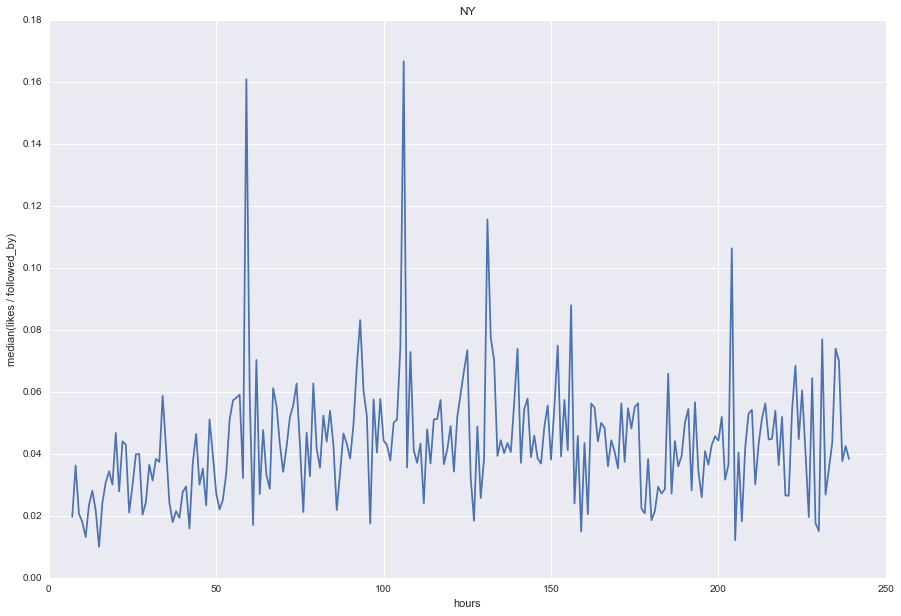

In [81]:
hours_median_density = []
for hour in xrange(240):
    hours_median_density.append(df[df['hours_passed_int'] == hour]['likes_density'].median())
    
plt.figure(figsize=(15,10))
plt.plot(hours_median_density)
plt.title('NY')
plt.xlabel('hours')
plt.ylabel('median(likes / followed_by)')
plt.show()

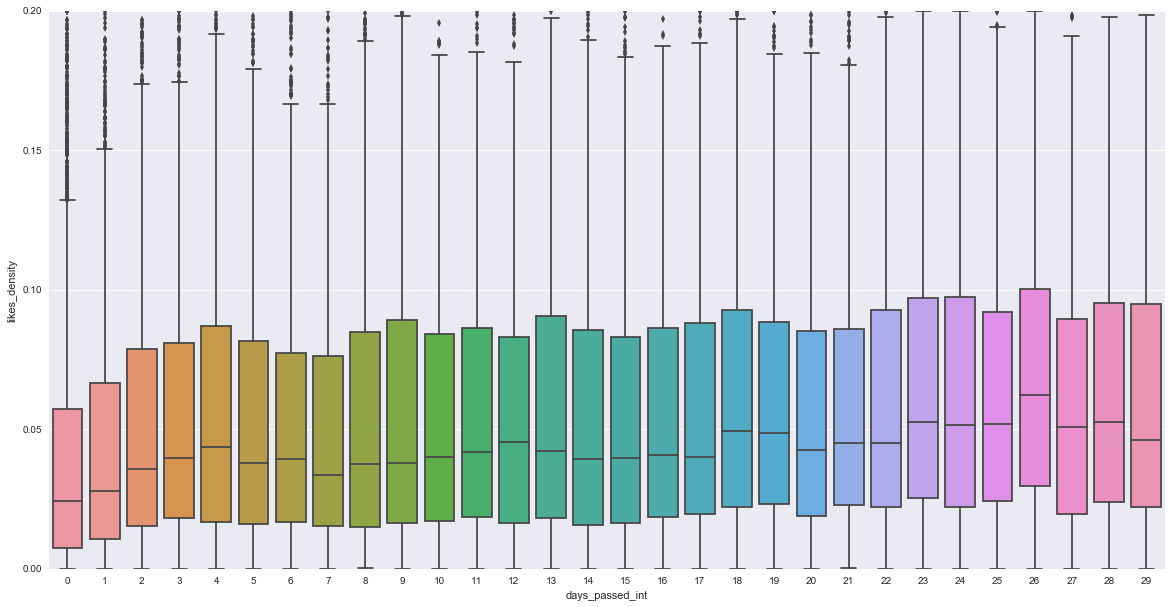

In [72]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='days_passed_int', y='likes_density', 
            data=df[(df['days_passed_int'] < 100) & (df['likes_density'] < 0.2)])
plt.show()

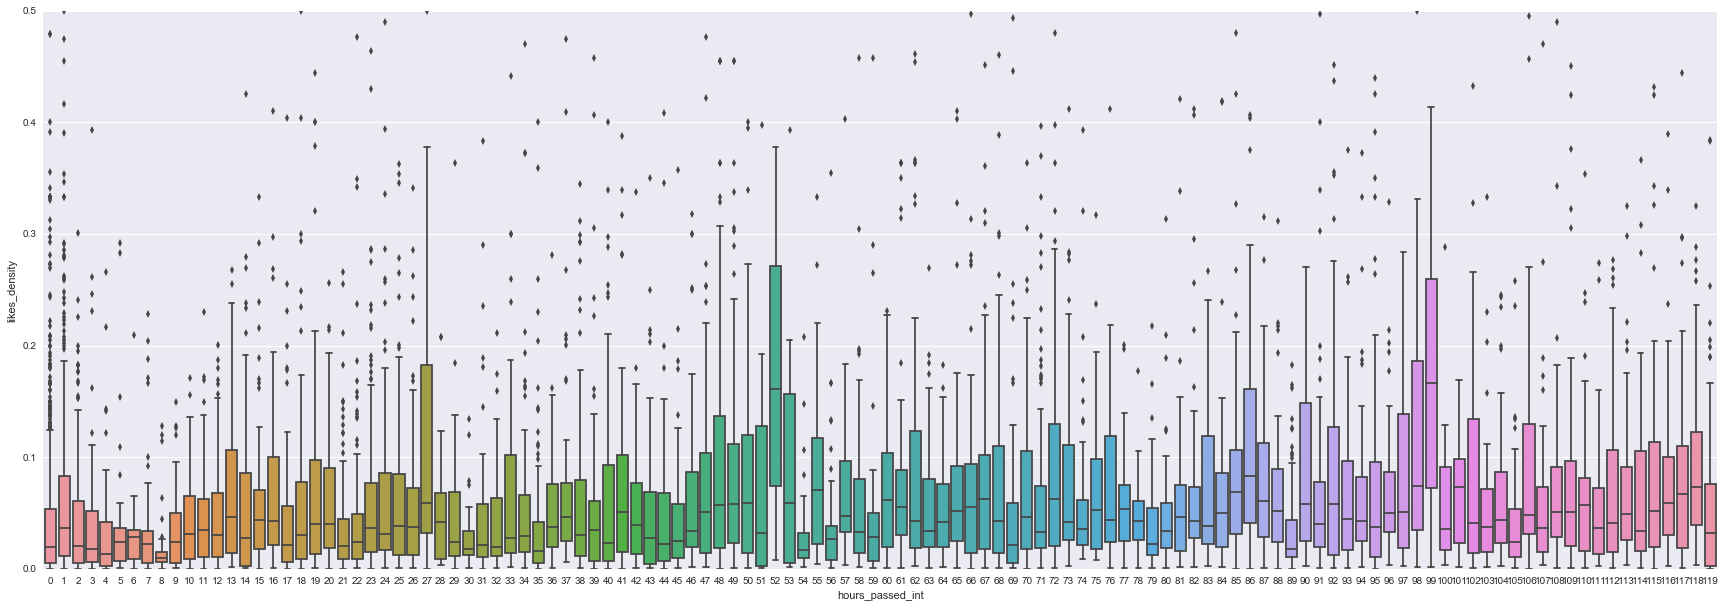

In [84]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='hours_passed_int', y='likes_density', data=df[df['hours_passed_int'] < 24 * 5], )
plt.show()

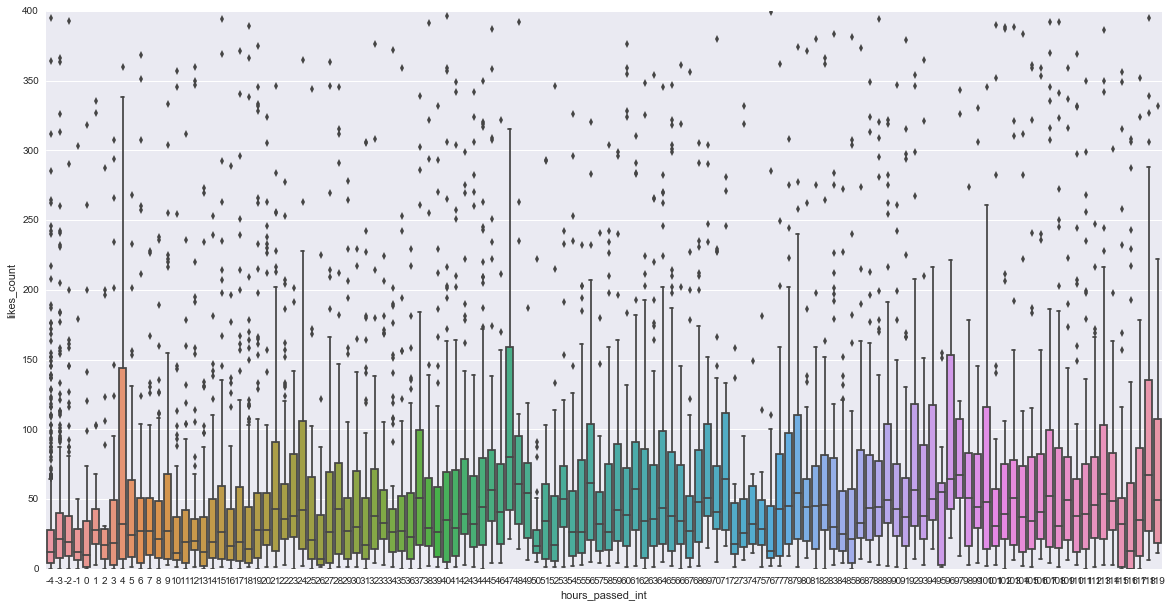

In [35]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='hours_passed_int', y='likes_count', data=df[df['hours_passed_int'] < 24 * 5], )
plt.show()

In [8]:
time.time() - 1452812912

43602001.758249044

In [73]:
def get_location(image_code):
    url = 'https://www.instagram.com/p/{}/?__a=1'.format(image_code)
    print url
    resp_img = requests.get(url, headers=headers)
    print resp_img
    
    
    resp_img.json()
    location = resp_img['graphql']['shortcode_media']['location']

    if location is None:
        return None

    location_id = location['id']

    resp_img = requests.get('https://www.instagram.com/explore/locations/{}/?__a=1'.format(location_id), 
                            headers=headers).json()
    location = resp_img['graphql']['shortcode_media']['location']
    latlon = []
    if location_id in locations:
        latlon = locations[location_id]
    location['latlon': latlon]

get_location('BUtjH8-gvwrzgLhp_nDLUmoWOD53w-yJ574ShQ0')

https://www.instagram.com/p/BUtjH8-gvwrzgLhp_nDLUmoWOD53w-yJ574ShQ0/?__a=1
<Response [404]>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [75]:
begining = [25025320]

instagram_users = OrderedDict({u:{} for u in begining})
imgs = {}
locations = {}

i = -1
while len(imgs) < 200000:
    i += 1
    if i % 1000 == 0:
        with open('1000_imgs{}.pkl'.format(i), 'wb') as imgs_file:
            pickle.dump(imgs, imgs_file, 2)
        with open('users{}.pkl'.format(i), 'wb') as users_file:
            pickle.dump(instagram_users, users_file, 2)
            
    print 'len images:', len(imgs), 'len users:', len(instagram_users), 'len i:', i
    username_or_id = instagram_users.keys()[i]
    try:
        resp = get_info_by_id(username_or_id)
    except Exception, e:
        print e, 123
        continue
    try:
        user_dict = iter(resp[u'media']['nodes']).next()[u'owner']
    except Exception, e:
        continue
    username = user_dict['username']
        
    instagram_users[username] = copy.deepcopy(user_dict)

    followed_by_count = user_dict[u'followed_by'][u'count']
    follows_count = user_dict[u'follows'][u'count']

    if follows_count > followed_by_count * 5:
        print 'http://www.instagram.com/' + username, followed_by_count, follows_count
        continue

    for node in resp[u'media']['nodes']:
        if node[u'is_video']:
            continue
            
        ts = node[u'date']
        seconds_passed = time.time() - ts
        if seconds_passed / 60 / 60 / 24 < 4:
            continue
            
        image_tags = set()
        caption_length = 0
        if u'caption' in node:
            for part in node[u'caption'].split('#')[1:]:
                if part.split():
                    image_tags.add(part.split()[0].strip())
            caption_length = len(node[u'caption'].split())

        likes_count = node[u'likes'][u'count']
        comments_count = node[u'comments'][u'count']
        image_code = node[u'code']
            
        imgs[node[u'thumbnail_src']] = {'image_tags': image_tags,
                                        'likes_count': likes_count,
                                        'followed_by_count': followed_by_count,
                                        'follows_count': follows_count,
                                        'username': username,
                                        'seconds_passed': seconds_passed,
                                        'timestamp': ts,
                                        'id': node[u'id'],
                                        'code': image_code,
                                        'caption_length': caption_length,
                                        'location': location
                                       }

    if i + 1000 > len(instagram_users):
        try:
            resp_media = requests.get('http://www.instagram.com/{}/media'.format(username), headers=headers).json()
        except Exception, e:
            print e
            continue
        items = resp_media[u'items']
        for item in items:
            for data in item['likes']['data']:
                liked_user = data['id']
                if liked_user not in instagram_users:
                    instagram_users[liked_user] = {}

with open('100000_imgs.pkl', 'wb') as imgs_file:
    pickle.dump(imgs, imgs_file, 2)


with open('users.pkl', 'wb') as users_file:
    pickle.dump(instagram_users, users_file, 2)

len images: 0 len users: 1 len i: 0
len images: 75 len users: 79 len i: 1
len images: 75 len users: 79 len i: 2
len images: 114 len users: 113 len i: 3
len images: 114 len users: 113 len i: 4
len images: 116 len users: 124 len i: 5
len images: 116 len users: 124 len i: 6
len images: 116 len users: 124 len i: 7
len images: 116 len users: 124 len i: 8
len images: 136 len users: 167 len i: 9
len images: 136 len users: 167 len i: 10
len images: 147 len users: 177 len i: 11
len images: 147 len users: 177 len i: 12
http://www.instagram.com/addisonmacintyre 0 2
len images: 147 len users: 178 len i: 13
len images: 247 len users: 200 len i: 14
len images: 266 len users: 271 len i: 15
len images: 267 len users: 276 len i: 16
len images: 358 len users: 325 len i: 17
len images: 358 len users: 325 len i: 18
http://www.instagram.com/theluxurytech 2 40
len images: 358 len users: 326 len i: 19
len images: 358 len users: 326 len i: 20
len images: 378 len users: 397 len i: 21
len images: 409 len users:

len images: 3951 len users: 1206 len i: 183
len images: 3951 len users: 1206 len i: 184
len images: 3951 len users: 1206 len i: 185
len images: 3951 len users: 1206 len i: 186
len images: 3951 len users: 1206 len i: 187
len images: 3951 len users: 1206 len i: 188
len images: 4044 len users: 1207 len i: 189
len images: 4044 len users: 1207 len i: 190
len images: 4044 len users: 1207 len i: 191
len images: 4044 len users: 1207 len i: 192
len images: 4044 len users: 1207 len i: 193
len images: 4044 len users: 1207 len i: 194
len images: 4125 len users: 1208 len i: 195
len images: 4160 len users: 1209 len i: 196
len images: 4160 len users: 1209 len i: 197
len images: 4160 len users: 1209 len i: 198
len images: 4160 len users: 1209 len i: 199
len images: 4160 len users: 1209 len i: 200
len images: 4160 len users: 1209 len i: 201
len images: 4244 len users: 1210 len i: 202
len images: 4331 len users: 1211 len i: 203
len images: 4358 len users: 1212 len i: 204
len images: 4358 len users: 1212

len images: 10798 len users: 1398 len i: 365
len images: 10898 len users: 1399 len i: 366
len images: 10991 len users: 1400 len i: 367
len images: 11087 len users: 1401 len i: 368
len images: 11175 len users: 1402 len i: 369
len images: 11175 len users: 1402 len i: 370
len images: 11274 len users: 1403 len i: 371
len images: 11295 len users: 1404 len i: 372
len images: 11394 len users: 1405 len i: 373
len images: 11394 len users: 1405 len i: 374
len images: 11490 len users: 1406 len i: 375
len images: 11494 len users: 1407 len i: 376
len images: 11519 len users: 1408 len i: 377
len images: 11609 len users: 1409 len i: 378
len images: 11661 len users: 1410 len i: 379
len images: 11661 len users: 1410 len i: 380
len images: 11760 len users: 1411 len i: 381
len images: 11805 len users: 1412 len i: 382
len images: 11805 len users: 1412 len i: 383
len images: 11808 len users: 1413 len i: 384
len images: 11846 len users: 1414 len i: 385
len images: 11859 len users: 1415 len i: 386
len images

len images: 16852 len users: 1565 len i: 546
len images: 16852 len users: 1565 len i: 547
len images: 16935 len users: 1566 len i: 548
len images: 16977 len users: 1567 len i: 549
len images: 16981 len users: 1568 len i: 550
len images: 17019 len users: 1569 len i: 551
len images: 17098 len users: 1570 len i: 552
len images: 17098 len users: 1570 len i: 553
len images: 17193 len users: 1571 len i: 554
len images: 17217 len users: 1572 len i: 555
len images: 17245 len users: 1573 len i: 556
len images: 17330 len users: 1574 len i: 557
len images: 17341 len users: 1575 len i: 558
len images: 17341 len users: 1575 len i: 559
len images: 17437 len users: 1576 len i: 560
len images: 17528 len users: 1577 len i: 561
len images: 17528 len users: 1577 len i: 562
len images: 17570 len users: 1578 len i: 563
len images: 17657 len users: 1579 len i: 564
len images: 17755 len users: 1580 len i: 565
len images: 17775 len users: 1581 len i: 566
len images: 17872 len users: 1582 len i: 567
len images

len images: 23750 len users: 1760 len i: 729
len images: 23750 len users: 1760 len i: 730
len images: 23847 len users: 1761 len i: 731
len images: 23936 len users: 1762 len i: 732
len images: 24035 len users: 1763 len i: 733
len images: 24128 len users: 1764 len i: 734
len images: 24225 len users: 1765 len i: 735
len images: 24273 len users: 1766 len i: 736
len images: 24362 len users: 1767 len i: 737
len images: 24461 len users: 1768 len i: 738
len images: 24559 len users: 1769 len i: 739
len images: 24657 len users: 1770 len i: 740
len images: 24657 len users: 1770 len i: 741
len images: 24657 len users: 1770 len i: 742
len images: 24663 len users: 1771 len i: 743
len images: 24669 len users: 1772 len i: 744
len images: 24769 len users: 1773 len i: 745
len images: 24778 len users: 1774 len i: 746
len images: 24877 len users: 1775 len i: 747
len images: 24877 len users: 1776 len i: 748
len images: 24942 len users: 1777 len i: 749
len images: 25038 len users: 1778 len i: 750
len images

len images: 32237 len users: 1958 len i: 908
len images: 32334 len users: 1959 len i: 909
len images: 32334 len users: 1959 len i: 910
len images: 32431 len users: 1960 len i: 911
len images: 32514 len users: 1961 len i: 912
len images: 32514 len users: 1961 len i: 913
len images: 32613 len users: 1962 len i: 914
len images: 32707 len users: 1963 len i: 915
len images: 32707 len users: 1963 len i: 916
len images: 32707 len users: 1963 len i: 917
len images: 32707 len users: 1963 len i: 918
len images: 32801 len users: 1964 len i: 919
len images: 32801 len users: 1964 len i: 920
len images: 32801 len users: 1964 len i: 921
len images: 32802 len users: 1965 len i: 922
len images: 32841 len users: 1966 len i: 923
len images: 32841 len users: 1966 len i: 924
len images: 32888 len users: 1967 len i: 925
len images: 32888 len users: 1967 len i: 926
len images: 32977 len users: 1968 len i: 927
len images: 33073 len users: 1969 len i: 928
len images: 33090 len users: 1970 len i: 929
len images

len images: 39354 len users: 2149 len i: 1085
len images: 39428 len users: 2150 len i: 1086
len images: 39428 len users: 2150 len i: 1087
len images: 39489 len users: 2151 len i: 1088
len images: 39550 len users: 2152 len i: 1089
len images: 39592 len users: 2153 len i: 1090
len images: 39643 len users: 2154 len i: 1091
len images: 39719 len users: 2155 len i: 1092
len images: 39719 len users: 2155 len i: 1093
len images: 39721 len users: 2156 len i: 1094
len images: 39721 len users: 2156 len i: 1095
len images: 39733 len users: 2157 len i: 1096
len images: 39817 len users: 2158 len i: 1097
len images: 39895 len users: 2159 len i: 1098
len images: 39968 len users: 2160 len i: 1099
len images: 40047 len users: 2161 len i: 1100
len images: 40128 len users: 2162 len i: 1101
len images: 40128 len users: 2162 len i: 1102
len images: 40128 len users: 2162 len i: 1103
len images: 40128 len users: 2162 len i: 1104
len images: 40128 len users: 2162 len i: 1105
len images: 40128 len users: 2162 

len images: 41600 len users: 2322 len i: 1263
len images: 41696 len users: 2323 len i: 1264
len images: 41783 len users: 2324 len i: 1265
len images: 41882 len users: 2325 len i: 1266
len images: 41977 len users: 2326 len i: 1267
len images: 42061 len users: 2327 len i: 1268
len images: 42063 len users: 2328 len i: 1269
len images: 42113 len users: 2329 len i: 1270
len images: 42212 len users: 2330 len i: 1271
len images: 42310 len users: 2331 len i: 1272
len images: 42400 len users: 2332 len i: 1273
len images: 42410 len users: 2333 len i: 1274
len images: 42510 len users: 2334 len i: 1275
len images: 42607 len users: 2335 len i: 1276
len images: 42703 len users: 2336 len i: 1277
len images: 42802 len users: 2337 len i: 1278
len images: 42860 len users: 2338 len i: 1279
len images: 42957 len users: 2339 len i: 1280
len images: 42985 len users: 2340 len i: 1281
len images: 43077 len users: 2341 len i: 1282
len images: 43169 len users: 2342 len i: 1283
len images: 43267 len users: 2343 

len images: 46811 len users: 2386 len i: 1441
len images: 46811 len users: 2386 len i: 1442
len images: 46811 len users: 2386 len i: 1443
len images: 46811 len users: 2386 len i: 1444
len images: 46811 len users: 2386 len i: 1445
len images: 46811 len users: 2386 len i: 1446
len images: 46811 len users: 2386 len i: 1447
len images: 46811 len users: 2386 len i: 1448
len images: 46811 len users: 2386 len i: 1449
len images: 46811 len users: 2386 len i: 1450
len images: 46811 len users: 2386 len i: 1451
len images: 46811 len users: 2386 len i: 1452
len images: 46811 len users: 2386 len i: 1453
len images: 46811 len users: 2386 len i: 1454
len images: 46811 len users: 2386 len i: 1455
len images: 46811 len users: 2386 len i: 1456
len images: 46811 len users: 2386 len i: 1457
len images: 46811 len users: 2386 len i: 1458
len images: 46811 len users: 2386 len i: 1459
len images: 46811 len users: 2386 len i: 1460
len images: 46811 len users: 2386 len i: 1461
len images: 46811 len users: 2386 

len images: 48072 len users: 2661 len i: 1620
len images: 48172 len users: 2662 len i: 1621
len images: 48206 len users: 2663 len i: 1622
len images: 48304 len users: 2664 len i: 1623
len images: 48304 len users: 2664 len i: 1624
len images: 48351 len users: 2665 len i: 1625
len images: 48376 len users: 2666 len i: 1626
len images: 48412 len users: 2667 len i: 1627
len images: 48504 len users: 2668 len i: 1628
len images: 48549 len users: 2669 len i: 1629
len images: 48586 len users: 2670 len i: 1630
len images: 48603 len users: 2671 len i: 1631
len images: 48603 len users: 2671 len i: 1632
len images: 48613 len users: 2672 len i: 1633
len images: 48658 len users: 2673 len i: 1634
len images: 48751 len users: 2674 len i: 1635
len images: 48851 len users: 2675 len i: 1636
len images: 48882 len users: 2676 len i: 1637
len images: 48979 len users: 2677 len i: 1638
len images: 48994 len users: 2678 len i: 1639
len images: 49092 len users: 2679 len i: 1640
len images: 49132 len users: 2680 

len images: 51530 len users: 2719 len i: 1799
len images: 51530 len users: 2719 len i: 1800
len images: 51530 len users: 2719 len i: 1801
len images: 51530 len users: 2719 len i: 1802
len images: 51530 len users: 2719 len i: 1803
len images: 51530 len users: 2719 len i: 1804
len images: 51530 len users: 2719 len i: 1805
len images: 51530 len users: 2719 len i: 1806
len images: 51530 len users: 2719 len i: 1807
len images: 51530 len users: 2719 len i: 1808
len images: 51530 len users: 2719 len i: 1809
len images: 51530 len users: 2719 len i: 1810
len images: 51530 len users: 2719 len i: 1811
len images: 51530 len users: 2719 len i: 1812
len images: 51530 len users: 2719 len i: 1813
len images: 51530 len users: 2719 len i: 1814
len images: 51530 len users: 2719 len i: 1815
len images: 51530 len users: 2719 len i: 1816
len images: 51530 len users: 2719 len i: 1817
len images: 51530 len users: 2719 len i: 1818
len images: 51530 len users: 2719 len i: 1819
len images: 51530 len users: 2719 

len images: 54821 len users: 2970 len i: 1978
len images: 54821 len users: 2970 len i: 1979
len images: 54821 len users: 2970 len i: 1980
len images: 54821 len users: 2970 len i: 1981
len images: 54821 len users: 2970 len i: 1982
len images: 54821 len users: 2970 len i: 1983
len images: 54821 len users: 2970 len i: 1984
len images: 54821 len users: 2970 len i: 1985
len images: 54821 len users: 2970 len i: 1986
len images: 54821 len users: 2970 len i: 1987
len images: 54821 len users: 2970 len i: 1988
len images: 54821 len users: 2970 len i: 1989
len images: 54821 len users: 2970 len i: 1990
len images: 54821 len users: 2970 len i: 1991
len images: 54821 len users: 2970 len i: 1992
len images: 54821 len users: 2970 len i: 1993
len images: 54821 len users: 2970 len i: 1994
len images: 54821 len users: 2970 len i: 1995
len images: 54821 len users: 2970 len i: 1996
len images: 54821 len users: 2970 len i: 1997
len images: 54821 len users: 2970 len i: 1998
len images: 54821 len users: 2970 

len images: 56080 len users: 3147 len i: 2157
len images: 56080 len users: 3147 len i: 2158
len images: 56080 len users: 3147 len i: 2159
len images: 56080 len users: 3147 len i: 2160
len images: 56080 len users: 3147 len i: 2161
len images: 56080 len users: 3147 len i: 2162
len images: 56080 len users: 3147 len i: 2163
len images: 56093 len users: 3172 len i: 2164
len images: 56093 len users: 3172 len i: 2165
len images: 56097 len users: 3173 len i: 2166
http://www.instagram.com/godson_melvin_gift 1272 7501
len images: 56097 len users: 3174 len i: 2167
len images: 56130 len users: 3175 len i: 2168
len images: 56130 len users: 3175 len i: 2169
len images: 56140 len users: 3176 len i: 2170
len images: 56225 len users: 3177 len i: 2171
len images: 56237 len users: 3178 len i: 2172
len images: 56274 len users: 3179 len i: 2173
len images: 56370 len users: 3180 len i: 2174
len images: 56379 len users: 3181 len i: 2175
len images: 56382 len users: 3182 len i: 2176
len images: 56394 len user

len images: 61323 len users: 3340 len i: 2334
len images: 61323 len users: 3340 len i: 2335
len images: 61323 len users: 3340 len i: 2336
len images: 61323 len users: 3340 len i: 2337
len images: 61323 len users: 3340 len i: 2338
len images: 61323 len users: 3340 len i: 2339
len images: 61323 len users: 3340 len i: 2340
len images: 61323 len users: 3340 len i: 2341
len images: 61323 len users: 3340 len i: 2342
len images: 61323 len users: 3340 len i: 2343
len images: 61323 len users: 3340 len i: 2344
len images: 61323 len users: 3340 len i: 2345
len images: 61323 len users: 3340 len i: 2346
len images: 61323 len users: 3340 len i: 2347
len images: 61323 len users: 3340 len i: 2348
len images: 61323 len users: 3340 len i: 2349
len images: 61323 len users: 3340 len i: 2350
len images: 61323 len users: 3340 len i: 2351
len images: 61323 len users: 3340 len i: 2352
len images: 61323 len users: 3340 len i: 2353
len images: 61323 len users: 3340 len i: 2354
len images: 61323 len users: 3340 

len images: 64357 len users: 3526 len i: 2512
len images: 64357 len users: 3526 len i: 2513
len images: 64357 len users: 3526 len i: 2514
len images: 64357 len users: 3526 len i: 2515
len images: 64357 len users: 3526 len i: 2516
len images: 64360 len users: 3527 len i: 2517
len images: 64360 len users: 3527 len i: 2518
len images: 64455 len users: 3528 len i: 2519
len images: 64455 len users: 3528 len i: 2520
len images: 64455 len users: 3528 len i: 2521
len images: 64551 len users: 3529 len i: 2522
len images: 64646 len users: 3530 len i: 2523
len images: 64646 len users: 3530 len i: 2524
len images: 64646 len users: 3530 len i: 2525
len images: 64646 len users: 3530 len i: 2526
len images: 64646 len users: 3530 len i: 2527
len images: 64646 len users: 3530 len i: 2528
len images: 64652 len users: 3531 len i: 2529
len images: 64749 len users: 3532 len i: 2530
len images: 64749 len users: 3532 len i: 2531
len images: 64846 len users: 3533 len i: 2532
len images: 64910 len users: 3534 

len images: 69740 len users: 3733 len i: 2691
len images: 69740 len users: 3733 len i: 2692
len images: 69740 len users: 3733 len i: 2693
len images: 69740 len users: 3733 len i: 2694
len images: 69740 len users: 3733 len i: 2695
len images: 69740 len users: 3733 len i: 2696
len images: 69740 len users: 3733 len i: 2697
len images: 69740 len users: 3733 len i: 2698
len images: 69740 len users: 3733 len i: 2699
len images: 69740 len users: 3733 len i: 2700
len images: 69740 len users: 3733 len i: 2701
len images: 69740 len users: 3733 len i: 2702
len images: 69740 len users: 3733 len i: 2703
len images: 69740 len users: 3733 len i: 2704
len images: 69740 len users: 3733 len i: 2705
len images: 69740 len users: 3733 len i: 2706
len images: 69740 len users: 3733 len i: 2707
len images: 69740 len users: 3733 len i: 2708
len images: 69740 len users: 3733 len i: 2709
len images: 69740 len users: 3733 len i: 2710
len images: 69740 len users: 3733 len i: 2711
len images: 69740 len users: 3733 

len images: 74805 len users: 3890 len i: 2869
len images: 74805 len users: 3890 len i: 2870
len images: 74898 len users: 3891 len i: 2871
len images: 74998 len users: 3892 len i: 2872
len images: 75095 len users: 3893 len i: 2873
len images: 75195 len users: 3894 len i: 2874
len images: 75241 len users: 3895 len i: 2875
len images: 75307 len users: 3896 len i: 2876
len images: 75320 len users: 3897 len i: 2877
len images: 75343 len users: 3898 len i: 2878
len images: 75346 len users: 3899 len i: 2879
len images: 75441 len users: 3900 len i: 2880
len images: 75535 len users: 3901 len i: 2881
len images: 75633 len users: 3902 len i: 2882
len images: 75726 len users: 3903 len i: 2883
http://www.instagram.com/apepezu_____ 7 37
len images: 75726 len users: 3904 len i: 2884
len images: 75823 len users: 3905 len i: 2885
len images: 75909 len users: 3906 len i: 2886
len images: 76008 len users: 3907 len i: 2887
len images: 76008 len users: 3907 len i: 2888
len images: 76106 len users: 3908 len

len images: 79830 len users: 4053 len i: 3046
len images: 79830 len users: 4053 len i: 3047
len images: 79867 len users: 4054 len i: 3048
len images: 79957 len users: 4055 len i: 3049
len images: 79992 len users: 4056 len i: 3050
len images: 79992 len users: 4056 len i: 3051
len images: 80045 len users: 4057 len i: 3052
len images: 80091 len users: 4058 len i: 3053
len images: 80091 len users: 4058 len i: 3054
len images: 80091 len users: 4058 len i: 3055
len images: 80131 len users: 4059 len i: 3056
len images: 80131 len users: 4059 len i: 3057
len images: 80131 len users: 4059 len i: 3058
len images: 80131 len users: 4059 len i: 3059
len images: 80215 len users: 4060 len i: 3060
len images: 80215 len users: 4060 len i: 3061
len images: 80215 len users: 4060 len i: 3062
len images: 80215 len users: 4060 len i: 3063
len images: 80215 len users: 4060 len i: 3064
len images: 80232 len users: 4083 len i: 3065
len images: 80232 len users: 4083 len i: 3066
len images: 80232 len users: 4083 

len images: 82321 len users: 4269 len i: 3223
len images: 82321 len users: 4269 len i: 3224
len images: 82321 len users: 4269 len i: 3225
len images: 82407 len users: 4270 len i: 3226
len images: 82430 len users: 4271 len i: 3227
len images: 82430 len users: 4271 len i: 3228
len images: 82430 len users: 4271 len i: 3229
len images: 82430 len users: 4271 len i: 3230
len images: 82430 len users: 4271 len i: 3231
len images: 82430 len users: 4271 len i: 3232
len images: 82515 len users: 4272 len i: 3233
len images: 82515 len users: 4272 len i: 3234
len images: 82515 len users: 4272 len i: 3235
len images: 82615 len users: 4273 len i: 3236
len images: 82715 len users: 4274 len i: 3237
len images: 82718 len users: 4275 len i: 3238
len images: 82811 len users: 4276 len i: 3239
len images: 82811 len users: 4276 len i: 3240
len images: 82860 len users: 4277 len i: 3241
len images: 82894 len users: 4278 len i: 3242
len images: 82994 len users: 4279 len i: 3243
len images: 83094 len users: 4280 

len images: 85962 len users: 4410 len i: 3398
len images: 85978 len users: 4411 len i: 3399
len images: 85986 len users: 4412 len i: 3400
http://www.instagram.com/nana_agyei_sikapa_wan_ 93 650
len images: 85986 len users: 4413 len i: 3401
len images: 85986 len users: 4413 len i: 3402
len images: 85993 len users: 4414 len i: 3403
len images: 86002 len users: 4415 len i: 3404
len images: 86099 len users: 4416 len i: 3405
len images: 86114 len users: 4417 len i: 3406
len images: 86122 len users: 4418 len i: 3407
http://www.instagram.com/anil_oooooooo 1118 7438
len images: 86122 len users: 4419 len i: 3408
len images: 86122 len users: 4419 len i: 3409
len images: 86138 len users: 4420 len i: 3410
len images: 86160 len users: 4421 len i: 3411
len images: 86258 len users: 4422 len i: 3412
len images: 86271 len users: 4423 len i: 3413
len images: 86271 len users: 4423 len i: 3414
len images: 86343 len users: 4424 len i: 3415
len images: 86343 len users: 4424 len i: 3416
len images: 86343 len 

len images: 90159 len users: 4578 len i: 3573
len images: 90159 len users: 4578 len i: 3574
len images: 90159 len users: 4578 len i: 3575
len images: 90159 len users: 4578 len i: 3576
len images: 90159 len users: 4578 len i: 3577
len images: 90159 len users: 4578 len i: 3578
len images: 90159 len users: 4578 len i: 3579
len images: 90159 len users: 4578 len i: 3580
len images: 90159 len users: 4578 len i: 3581
len images: 90159 len users: 4578 len i: 3582
len images: 90159 len users: 4578 len i: 3583
len images: 90159 len users: 4578 len i: 3584
len images: 90159 len users: 4578 len i: 3585
len images: 90159 len users: 4578 len i: 3586
len images: 90159 len users: 4578 len i: 3587
len images: 90159 len users: 4578 len i: 3588
len images: 90159 len users: 4578 len i: 3589
len images: 90159 len users: 4578 len i: 3590
len images: 90159 len users: 4578 len i: 3591
len images: 90159 len users: 4578 len i: 3592
len images: 90159 len users: 4578 len i: 3593
len images: 90159 len users: 4578 

len images: 91683 len users: 4735 len i: 3742
len images: 91683 len users: 4735 len i: 3743
len images: 91683 len users: 4735 len i: 3744
len images: 91683 len users: 4735 len i: 3745
len images: 91683 len users: 4735 len i: 3746
len images: 91767 len users: 4809 len i: 3747
len images: 91797 len users: 4810 len i: 3748
len images: 91877 len users: 4811 len i: 3749
len images: 91960 len users: 4812 len i: 3750
len images: 92003 len users: 4813 len i: 3751
len images: 92083 len users: 4814 len i: 3752
len images: 92098 len users: 4815 len i: 3753
len images: 92194 len users: 4816 len i: 3754
len images: 92211 len users: 4817 len i: 3755
len images: 92244 len users: 4818 len i: 3756
len images: 92244 len users: 4819 len i: 3757
len images: 92335 len users: 4820 len i: 3758
len images: 92384 len users: 4821 len i: 3759
len images: 92482 len users: 4822 len i: 3760
len images: 92510 len users: 4823 len i: 3761
len images: 92603 len users: 4824 len i: 3762
len images: 92603 len users: 4824 

len images: 94781 len users: 4861 len i: 3920
len images: 94781 len users: 4861 len i: 3921
len images: 94781 len users: 4861 len i: 3922
len images: 94781 len users: 4861 len i: 3923
len images: 94781 len users: 4861 len i: 3924
len images: 94781 len users: 4861 len i: 3925
len images: 94781 len users: 4861 len i: 3926
len images: 94781 len users: 4861 len i: 3927
len images: 94781 len users: 4861 len i: 3928
len images: 94781 len users: 4861 len i: 3929
len images: 94781 len users: 4861 len i: 3930
len images: 94781 len users: 4861 len i: 3931
len images: 94781 len users: 4861 len i: 3932
len images: 94781 len users: 4861 len i: 3933
len images: 94781 len users: 4861 len i: 3934
len images: 94781 len users: 4861 len i: 3935
len images: 94781 len users: 4861 len i: 3936
len images: 94781 len users: 4861 len i: 3937
len images: 94781 len users: 4861 len i: 3938
len images: 94781 len users: 4861 len i: 3939
len images: 94781 len users: 4861 len i: 3940
len images: 94781 len users: 4861 

len images: 99357 len users: 5117 len i: 4095
len images: 99358 len users: 5118 len i: 4096
len images: 99358 len users: 5118 len i: 4097
len images: 99362 len users: 5119 len i: 4098
len images: 99429 len users: 5120 len i: 4099
len images: 99432 len users: 5121 len i: 4100
len images: 99433 len users: 5122 len i: 4101
len images: 99438 len users: 5123 len i: 4102
len images: 99438 len users: 5123 len i: 4103
len images: 99438 len users: 5123 len i: 4104
len images: 99438 len users: 5123 len i: 4105
len images: 99477 len users: 5124 len i: 4106
len images: 99520 len users: 5125 len i: 4107
len images: 99531 len users: 5126 len i: 4108
len images: 99588 len users: 5127 len i: 4109
len images: 99589 len users: 5128 len i: 4110
len images: 99589 len users: 5128 len i: 4111
len images: 99589 len users: 5129 len i: 4112
len images: 99606 len users: 5130 len i: 4113
len images: 99636 len users: 5131 len i: 4114
len images: 99636 len users: 5131 len i: 4115
len images: 99636 len users: 5131 

len images: 106226 len users: 5314 len i: 4266
len images: 106226 len users: 5314 len i: 4267
len images: 106226 len users: 5314 len i: 4268
len images: 106226 len users: 5314 len i: 4269
len images: 106226 len users: 5314 len i: 4270
len images: 106226 len users: 5314 len i: 4271
len images: 106226 len users: 5314 len i: 4272
len images: 106226 len users: 5314 len i: 4273
len images: 106226 len users: 5314 len i: 4274
len images: 106226 len users: 5314 len i: 4275
len images: 106226 len users: 5314 len i: 4276
len images: 106226 len users: 5314 len i: 4277
len images: 106226 len users: 5314 len i: 4278
len images: 106226 len users: 5314 len i: 4279
len images: 106226 len users: 5314 len i: 4280
len images: 106226 len users: 5314 len i: 4281
len images: 106226 len users: 5314 len i: 4282
len images: 106226 len users: 5314 len i: 4283
len images: 106226 len users: 5314 len i: 4284
len images: 106226 len users: 5314 len i: 4285
len images: 106226 len users: 5314 len i: 4286
len images: 1

len images: 108543 len users: 5422 len i: 4438
len images: 108543 len users: 5422 len i: 4439
len images: 108543 len users: 5422 len i: 4440
len images: 108543 len users: 5422 len i: 4441
len images: 108543 len users: 5422 len i: 4442
len images: 108543 len users: 5422 len i: 4443
len images: 108543 len users: 5422 len i: 4444
len images: 108543 len users: 5422 len i: 4445
len images: 108543 len users: 5422 len i: 4446
len images: 108543 len users: 5422 len i: 4447
len images: 108543 len users: 5422 len i: 4448
len images: 108543 len users: 5422 len i: 4449
len images: 108543 len users: 5422 len i: 4450
len images: 108543 len users: 5422 len i: 4451
len images: 108543 len users: 5422 len i: 4452
len images: 108543 len users: 5422 len i: 4453
len images: 108543 len users: 5422 len i: 4454
len images: 108543 len users: 5422 len i: 4455
len images: 108543 len users: 5422 len i: 4456
len images: 108543 len users: 5422 len i: 4457
len images: 108543 len users: 5422 len i: 4458
len images: 1

len images: 115255 len users: 5628 len i: 4612
len images: 115255 len users: 5628 len i: 4613
len images: 115255 len users: 5628 len i: 4614
len images: 115285 len users: 5629 len i: 4615
len images: 115285 len users: 5629 len i: 4616
len images: 115353 len users: 5630 len i: 4617
len images: 115353 len users: 5630 len i: 4618
len images: 115353 len users: 5630 len i: 4619
len images: 115366 len users: 5631 len i: 4620
len images: 115376 len users: 5632 len i: 4621
len images: 115407 len users: 5633 len i: 4622
len images: 115481 len users: 5634 len i: 4623
len images: 115485 len users: 5635 len i: 4624
len images: 115485 len users: 5635 len i: 4625
len images: 115485 len users: 5635 len i: 4626
len images: 115485 len users: 5635 len i: 4627
len images: 115525 len users: 5636 len i: 4628
len images: 115551 len users: 5637 len i: 4629
len images: 115567 len users: 5638 len i: 4630
len images: 115575 len users: 5639 len i: 4631
len images: 115579 len users: 5640 len i: 4632
len images: 1

len images: 119830 len users: 5796 len i: 4786
len images: 119923 len users: 5797 len i: 4787
len images: 119966 len users: 5798 len i: 4788
len images: 120045 len users: 5799 len i: 4789
len images: 120068 len users: 5800 len i: 4790
len images: 120068 len users: 5800 len i: 4791
len images: 120068 len users: 5800 len i: 4792
len images: 120068 len users: 5800 len i: 4793
len images: 120068 len users: 5800 len i: 4794
len images: 120068 len users: 5800 len i: 4795
len images: 120101 len users: 5801 len i: 4796
len images: 120196 len users: 5802 len i: 4797
len images: 120295 len users: 5803 len i: 4798
len images: 120394 len users: 5804 len i: 4799
len images: 120434 len users: 5805 len i: 4800
len images: 120530 len users: 5806 len i: 4801
len images: 120530 len users: 5806 len i: 4802
len images: 120559 len users: 5807 len i: 4803
len images: 120646 len users: 5808 len i: 4804
len images: 120740 len users: 5809 len i: 4805
len images: 120788 len users: 5810 len i: 4806
len images: 1

len images: 125098 len users: 5987 len i: 4957
len images: 125098 len users: 5987 len i: 4958
len images: 125098 len users: 5987 len i: 4959
len images: 125098 len users: 5987 len i: 4960
len images: 125098 len users: 5987 len i: 4961
len images: 125098 len users: 5987 len i: 4962
len images: 125098 len users: 5987 len i: 4963
len images: 125098 len users: 5987 len i: 4964
len images: 125098 len users: 5987 len i: 4965
len images: 125098 len users: 5987 len i: 4966
len images: 125098 len users: 5987 len i: 4967
len images: 125098 len users: 5987 len i: 4968
len images: 125098 len users: 5987 len i: 4969
len images: 125098 len users: 5987 len i: 4970
len images: 125098 len users: 5987 len i: 4971
len images: 125098 len users: 5987 len i: 4972
len images: 125098 len users: 5987 len i: 4973
len images: 125098 len users: 5987 len i: 4974
len images: 125098 len users: 5987 len i: 4975
len images: 125098 len users: 5987 len i: 4976
len images: 125098 len users: 5987 len i: 4977
len images: 1

len images: 128424 len users: 6115 len i: 5132
len images: 128424 len users: 6115 len i: 5133
len images: 128424 len users: 6115 len i: 5134
len images: 128424 len users: 6115 len i: 5135
len images: 128424 len users: 6115 len i: 5136
len images: 128424 len users: 6115 len i: 5137
len images: 128424 len users: 6115 len i: 5138
len images: 128424 len users: 6115 len i: 5139
len images: 128424 len users: 6115 len i: 5140
len images: 128424 len users: 6115 len i: 5141
len images: 128424 len users: 6115 len i: 5142
len images: 128424 len users: 6115 len i: 5143
len images: 128424 len users: 6115 len i: 5144
len images: 128424 len users: 6115 len i: 5145
len images: 128424 len users: 6115 len i: 5146
len images: 128424 len users: 6115 len i: 5147
len images: 128424 len users: 6115 len i: 5148
len images: 128424 len users: 6115 len i: 5149
len images: 128424 len users: 6115 len i: 5150
len images: 128424 len users: 6115 len i: 5151
len images: 128424 len users: 6115 len i: 5152
len images: 1

len images: 134375 len users: 6275 len i: 5305
len images: 134375 len users: 6275 len i: 5306
len images: 134375 len users: 6275 len i: 5307
len images: 134375 len users: 6275 len i: 5308
len images: 134375 len users: 6275 len i: 5309
len images: 134375 len users: 6275 len i: 5310
len images: 134375 len users: 6275 len i: 5311
len images: 134375 len users: 6275 len i: 5312
len images: 134375 len users: 6275 len i: 5313
len images: 134375 len users: 6275 len i: 5314
len images: 134375 len users: 6275 len i: 5315
len images: 134375 len users: 6275 len i: 5316
len images: 134375 len users: 6275 len i: 5317
len images: 134375 len users: 6275 len i: 5318
len images: 134375 len users: 6275 len i: 5319
len images: 134375 len users: 6275 len i: 5320
len images: 134375 len users: 6275 len i: 5321
len images: 134375 len users: 6275 len i: 5322
len images: 134375 len users: 6275 len i: 5323
len images: 134375 len users: 6275 len i: 5324
len images: 134375 len users: 6275 len i: 5325
len images: 1

len images: 141023 len users: 6494 len i: 5478
len images: 141076 len users: 6495 len i: 5479
len images: 141076 len users: 6495 len i: 5480
len images: 141076 len users: 6495 len i: 5481
len images: 141076 len users: 6495 len i: 5482
len images: 141076 len users: 6495 len i: 5483
len images: 141076 len users: 6495 len i: 5484
len images: 141076 len users: 6495 len i: 5485
len images: 141076 len users: 6495 len i: 5486
len images: 141076 len users: 6495 len i: 5487
len images: 141076 len users: 6495 len i: 5488
len images: 141076 len users: 6495 len i: 5489
len images: 141076 len users: 6495 len i: 5490
len images: 141076 len users: 6495 len i: 5491
len images: 141076 len users: 6495 len i: 5492
len images: 141076 len users: 6495 len i: 5493
len images: 141076 len users: 6495 len i: 5494
len images: 141076 len users: 6495 len i: 5495
len images: 141076 len users: 6495 len i: 5496
len images: 141076 len users: 6495 len i: 5497
len images: 141076 len users: 6495 len i: 5498
len images: 1

len images: 142071 len users: 6675 len i: 5652
len images: 142137 len users: 6676 len i: 5653
len images: 142137 len users: 6676 len i: 5654
len images: 142137 len users: 6676 len i: 5655
len images: 142137 len users: 6676 len i: 5656
len images: 142147 len users: 6677 len i: 5657
len images: 142147 len users: 6677 len i: 5658
len images: 142239 len users: 6678 len i: 5659
len images: 142239 len users: 6678 len i: 5660
len images: 142239 len users: 6678 len i: 5661
len images: 142257 len users: 6679 len i: 5662
len images: 142260 len users: 6680 len i: 5663
len images: 142260 len users: 6680 len i: 5664
len images: 142260 len users: 6680 len i: 5665
len images: 142260 len users: 6680 len i: 5666
len images: 142273 len users: 6681 len i: 5667
len images: 142276 len users: 6682 len i: 5668
len images: 142276 len users: 6682 len i: 5669
len images: 142370 len users: 6683 len i: 5670
len images: 142370 len users: 6683 len i: 5671
len images: 142370 len users: 6683 len i: 5672
len images: 1

len images: 143828 len users: 6854 len i: 5827
len images: 143828 len users: 6854 len i: 5828
len images: 143828 len users: 6854 len i: 5829
len images: 143923 len users: 6855 len i: 5830
len images: 143923 len users: 6855 len i: 5831
len images: 143947 len users: 6856 len i: 5832
len images: 143947 len users: 6856 len i: 5833
len images: 143947 len users: 6856 len i: 5834
len images: 143947 len users: 6856 len i: 5835
len images: 143947 len users: 6856 len i: 5836
len images: 143968 len users: 6857 len i: 5837
len images: 143968 len users: 6857 len i: 5838
len images: 143985 len users: 6858 len i: 5839
http://www.instagram.com/valentina.ailinps 109 715
len images: 143985 len users: 6859 len i: 5840
http://www.instagram.com/ardion23 56 1080
len images: 143985 len users: 6860 len i: 5841
http://www.instagram.com/iwacchaa 45 553
len images: 143985 len users: 6861 len i: 5842
http://www.instagram.com/sauce.walkin_ 110 586
len images: 143985 len users: 6862 len i: 5843
len images: 143985 l

len images: 147055 len users: 6991 len i: 5996
len images: 147055 len users: 6991 len i: 5997
len images: 147058 len users: 7069 len i: 5998
len images: 147058 len users: 7069 len i: 5999
len images: 147058 len users: 7069 len i: 6000
len images: 147158 len users: 7070 len i: 6001
len images: 147158 len users: 7070 len i: 6002
len images: 147158 len users: 7070 len i: 6003
len images: 147249 len users: 7071 len i: 6004
len images: 147249 len users: 7071 len i: 6005
len images: 147249 len users: 7071 len i: 6006
len images: 147249 len users: 7071 len i: 6007
len images: 147341 len users: 7072 len i: 6008
len images: 147341 len users: 7072 len i: 6009
len images: 147378 len users: 7073 len i: 6010
len images: 147378 len users: 7073 len i: 6011
len images: 147378 len users: 7073 len i: 6012
len images: 147378 len users: 7073 len i: 6013
len images: 147378 len users: 7073 len i: 6014
len images: 147378 len users: 7073 len i: 6015
len images: 147378 len users: 7073 len i: 6016
len images: 1

len images: 151716 len users: 7182 len i: 6171
len images: 151796 len users: 7183 len i: 6172
len images: 151895 len users: 7184 len i: 6173
len images: 151895 len users: 7184 len i: 6174
len images: 151895 len users: 7184 len i: 6175
len images: 151936 len users: 7185 len i: 6176
len images: 151936 len users: 7185 len i: 6177
len images: 151936 len users: 7185 len i: 6178
len images: 152031 len users: 7186 len i: 6179
len images: 152031 len users: 7186 len i: 6180
len images: 152118 len users: 7187 len i: 6181
len images: 152217 len users: 7188 len i: 6182
len images: 152315 len users: 7189 len i: 6183
len images: 152315 len users: 7189 len i: 6184
len images: 152411 len users: 7190 len i: 6185
len images: 152509 len users: 7191 len i: 6186
len images: 152601 len users: 7192 len i: 6187
len images: 152601 len users: 7192 len i: 6188
len images: 152625 len users: 7193 len i: 6189
len images: 152722 len users: 7194 len i: 6190
len images: 152722 len users: 7194 len i: 6191
len images: 1

len images: 156887 len users: 7373 len i: 6344
len images: 156978 len users: 7374 len i: 6345
len images: 156978 len users: 7374 len i: 6346
len images: 156978 len users: 7374 len i: 6347
len images: 156978 len users: 7374 len i: 6348
len images: 156978 len users: 7374 len i: 6349
len images: 156978 len users: 7374 len i: 6350
len images: 156978 len users: 7374 len i: 6351
len images: 157071 len users: 7375 len i: 6352
len images: 157171 len users: 7376 len i: 6353
len images: 157256 len users: 7377 len i: 6354
len images: 157256 len users: 7378 len i: 6355
len images: 157356 len users: 7379 len i: 6356
len images: 157425 len users: 7380 len i: 6357
len images: 157501 len users: 7381 len i: 6358
len images: 157501 len users: 7381 len i: 6359
len images: 157578 len users: 7382 len i: 6360
len images: 157665 len users: 7383 len i: 6361
len images: 157665 len users: 7383 len i: 6362
len images: 157665 len users: 7383 len i: 6363
len images: 157665 len users: 7383 len i: 6364
len images: 1

len images: 160987 len users: 7552 len i: 6519
len images: 161008 len users: 7553 len i: 6520
len images: 161008 len users: 7553 len i: 6521
len images: 161097 len users: 7554 len i: 6522
len images: 161097 len users: 7554 len i: 6523
len images: 161121 len users: 7555 len i: 6524
len images: 161123 len users: 7556 len i: 6525
len images: 161192 len users: 7557 len i: 6526
len images: 161194 len users: 7558 len i: 6527
len images: 161289 len users: 7559 len i: 6528
len images: 161332 len users: 7560 len i: 6529
len images: 161332 len users: 7560 len i: 6530
len images: 161332 len users: 7560 len i: 6531
len images: 161332 len users: 7560 len i: 6532
len images: 161335 len users: 7561 len i: 6533
len images: 161335 len users: 7561 len i: 6534
len images: 161433 len users: 7562 len i: 6535
len images: 161433 len users: 7562 len i: 6536
len images: 161531 len users: 7563 len i: 6537
len images: 161543 len users: 7564 len i: 6538
len images: 161552 len users: 7565 len i: 6539
len images: 1

len images: 164467 len users: 7694 len i: 6694
len images: 164467 len users: 7694 len i: 6695
len images: 164567 len users: 7695 len i: 6696
len images: 164567 len users: 7695 len i: 6697
len images: 164567 len users: 7695 len i: 6698
len images: 164567 len users: 7695 len i: 6699
len images: 164567 len users: 7695 len i: 6700
len images: 164567 len users: 7695 len i: 6701
len images: 164647 len users: 7774 len i: 6702
len images: 164678 len users: 7775 len i: 6703
len images: 164695 len users: 7776 len i: 6704
len images: 164695 len users: 7776 len i: 6705
len images: 164695 len users: 7776 len i: 6706
len images: 164777 len users: 7777 len i: 6707
len images: 164777 len users: 7777 len i: 6708
len images: 164777 len users: 7777 len i: 6709
len images: 164825 len users: 7778 len i: 6710
len images: 164849 len users: 7779 len i: 6711
len images: 164863 len users: 7780 len i: 6712
len images: 164863 len users: 7780 len i: 6713
len images: 164863 len users: 7780 len i: 6714
len images: 1

len images: 167256 len users: 7843 len i: 6869
len images: 167256 len users: 7843 len i: 6870
len images: 167256 len users: 7843 len i: 6871
len images: 167256 len users: 7843 len i: 6872
len images: 167256 len users: 7843 len i: 6873
len images: 167256 len users: 7843 len i: 6874
len images: 167256 len users: 7843 len i: 6875
len images: 167256 len users: 7843 len i: 6876
len images: 167256 len users: 7843 len i: 6877
len images: 167256 len users: 7843 len i: 6878
len images: 167256 len users: 7843 len i: 6879
len images: 167256 len users: 7843 len i: 6880
len images: 167256 len users: 7843 len i: 6881
len images: 167256 len users: 7843 len i: 6882
len images: 167321 len users: 7914 len i: 6883
len images: 167321 len users: 7914 len i: 6884
len images: 167321 len users: 7914 len i: 6885
len images: 167321 len users: 7914 len i: 6886
len images: 167409 len users: 7915 len i: 6887
len images: 167486 len users: 7916 len i: 6888
len images: 167507 len users: 7917 len i: 6889
len images: 1

len images: 170502 len users: 8045 len i: 7040
Expecting value: line 1 column 1 (char 0) 123
len images: 170502 len users: 8045 len i: 7041
len images: 170502 len users: 8045 len i: 7042
len images: 170502 len users: 8045 len i: 7043
len images: 170502 len users: 8045 len i: 7044
len images: 170502 len users: 8045 len i: 7045
len images: 170502 len users: 8045 len i: 7046
len images: 170502 len users: 8045 len i: 7047
len images: 170502 len users: 8045 len i: 7048
len images: 170502 len users: 8045 len i: 7049
len images: 170502 len users: 8045 len i: 7050
len images: 170502 len users: 8045 len i: 7051
len images: 170502 len users: 8045 len i: 7052
len images: 170502 len users: 8045 len i: 7053
len images: 170502 len users: 8045 len i: 7054
len images: 170502 len users: 8045 len i: 7055
len images: 170505 len users: 8088 len i: 7056
len images: 170505 len users: 8088 len i: 7057
len images: 170505 len users: 8088 len i: 7058
len images: 170505 len users: 8088 len i: 7059
len images: 17

len images: 173680 len users: 8264 len i: 7214
len images: 173680 len users: 8264 len i: 7215
len images: 173680 len users: 8264 len i: 7216
len images: 173680 len users: 8264 len i: 7217
len images: 173772 len users: 8265 len i: 7218
len images: 173772 len users: 8265 len i: 7219
len images: 173772 len users: 8265 len i: 7220
len images: 173772 len users: 8265 len i: 7221
len images: 173772 len users: 8265 len i: 7222
len images: 173772 len users: 8265 len i: 7223
len images: 173772 len users: 8265 len i: 7224
len images: 173772 len users: 8265 len i: 7225
len images: 173846 len users: 8266 len i: 7226
len images: 173944 len users: 8267 len i: 7227
http://www.instagram.com/john_boi98 1381 7500
len images: 173944 len users: 8268 len i: 7228
len images: 173944 len users: 8268 len i: 7229
len images: 173944 len users: 8268 len i: 7230
len images: 173944 len users: 8268 len i: 7231
len images: 173944 len users: 8268 len i: 7232
len images: 173992 len users: 8269 len i: 7233
len images: 17

len images: 177786 len users: 8398 len i: 7387
len images: 177786 len users: 8398 len i: 7388
len images: 177786 len users: 8398 len i: 7389
len images: 177786 len users: 8398 len i: 7390
len images: 177786 len users: 8398 len i: 7391
len images: 177786 len users: 8398 len i: 7392
len images: 177786 len users: 8398 len i: 7393
len images: 177786 len users: 8398 len i: 7394
len images: 177786 len users: 8398 len i: 7395
len images: 177786 len users: 8398 len i: 7396
len images: 177786 len users: 8398 len i: 7397
len images: 177786 len users: 8398 len i: 7398
len images: 177786 len users: 8398 len i: 7399
len images: 177786 len users: 8398 len i: 7400
len images: 177786 len users: 8398 len i: 7401
len images: 177786 len users: 8398 len i: 7402
len images: 177786 len users: 8398 len i: 7403
len images: 177786 len users: 8398 len i: 7404
len images: 177786 len users: 8398 len i: 7405
len images: 177786 len users: 8398 len i: 7406
len images: 177786 len users: 8398 len i: 7407
len images: 1

len images: 181218 len users: 8554 len i: 7558
len images: 181218 len users: 8554 len i: 7559
len images: 181218 len users: 8554 len i: 7560
len images: 181218 len users: 8554 len i: 7561
len images: 181218 len users: 8554 len i: 7562
len images: 181218 len users: 8554 len i: 7563
len images: 181218 len users: 8554 len i: 7564
len images: 181218 len users: 8554 len i: 7565
len images: 181218 len users: 8554 len i: 7566
len images: 181218 len users: 8554 len i: 7567
len images: 181218 len users: 8554 len i: 7568
len images: 181218 len users: 8554 len i: 7569
len images: 181218 len users: 8554 len i: 7570
len images: 181218 len users: 8554 len i: 7571
len images: 181218 len users: 8554 len i: 7572
len images: 181218 len users: 8554 len i: 7573
len images: 181218 len users: 8554 len i: 7574
len images: 181218 len users: 8554 len i: 7575
len images: 181218 len users: 8554 len i: 7576
len images: 181218 len users: 8554 len i: 7577
len images: 181218 len users: 8554 len i: 7578
len images: 1

len images: 183748 len users: 8740 len i: 7733
len images: 183823 len users: 8741 len i: 7734
len images: 183910 len users: 8742 len i: 7735
len images: 183945 len users: 8743 len i: 7736
len images: 183955 len users: 8744 len i: 7737
len images: 184055 len users: 8745 len i: 7738
len images: 184108 len users: 8746 len i: 7739
len images: 184121 len users: 8747 len i: 7740
len images: 184145 len users: 8748 len i: 7741
http://www.instagram.com/keyvan.balali93 1080 7504
len images: 184145 len users: 8749 len i: 7742
len images: 184189 len users: 8750 len i: 7743
len images: 184198 len users: 8751 len i: 7744
len images: 184215 len users: 8752 len i: 7745
len images: 184215 len users: 8752 len i: 7746
len images: 184231 len users: 8753 len i: 7747
len images: 184288 len users: 8754 len i: 7748
len images: 184383 len users: 8755 len i: 7749
len images: 184401 len users: 8756 len i: 7750
len images: 184445 len users: 8757 len i: 7751
len images: 184477 len users: 8758 len i: 7752
http://ww

len images: 186128 len users: 8902 len i: 7904
len images: 186128 len users: 8902 len i: 7905
len images: 186213 len users: 8973 len i: 7906
len images: 186213 len users: 8973 len i: 7907
len images: 186213 len users: 8973 len i: 7908
len images: 186300 len users: 8974 len i: 7909
len images: 186339 len users: 8975 len i: 7910
len images: 186339 len users: 8975 len i: 7911
len images: 186357 len users: 8976 len i: 7912
len images: 186357 len users: 8976 len i: 7913
len images: 186357 len users: 8976 len i: 7914
len images: 186357 len users: 8976 len i: 7915
len images: 186357 len users: 8976 len i: 7916
len images: 186357 len users: 8976 len i: 7917
len images: 186357 len users: 8976 len i: 7918
len images: 186357 len users: 8976 len i: 7919
len images: 186357 len users: 8976 len i: 7920
len images: 186357 len users: 8976 len i: 7921
len images: 186357 len users: 8976 len i: 7922
len images: 186357 len users: 8976 len i: 7923
len images: 186357 len users: 8976 len i: 7924
len images: 1

len images: 190307 len users: 9140 len i: 8079
len images: 190307 len users: 9140 len i: 8080
len images: 190388 len users: 9141 len i: 8081
len images: 190460 len users: 9142 len i: 8082
len images: 190465 len users: 9143 len i: 8083
len images: 190544 len users: 9144 len i: 8084
len images: 190633 len users: 9145 len i: 8085
len images: 190633 len users: 9145 len i: 8086
len images: 190633 len users: 9145 len i: 8087
len images: 190659 len users: 9146 len i: 8088
len images: 190659 len users: 9146 len i: 8089
len images: 190659 len users: 9146 len i: 8090
len images: 190659 len users: 9146 len i: 8091
len images: 190756 len users: 9147 len i: 8092
len images: 190855 len users: 9148 len i: 8093
len images: 190952 len users: 9149 len i: 8094
len images: 191050 len users: 9150 len i: 8095
len images: 191147 len users: 9151 len i: 8096
len images: 191242 len users: 9152 len i: 8097
len images: 191341 len users: 9153 len i: 8098
len images: 191341 len users: 9153 len i: 8099
len images: 1

len images: 199252 len users: 9258 len i: 8253
len images: 199252 len users: 9258 len i: 8254
len images: 199252 len users: 9258 len i: 8255
len images: 199288 len users: 9259 len i: 8256
len images: 199304 len users: 9260 len i: 8257
len images: 199360 len users: 9261 len i: 8258
len images: 199460 len users: 9262 len i: 8259
len images: 199460 len users: 9262 len i: 8260
len images: 199460 len users: 9262 len i: 8261
len images: 199460 len users: 9262 len i: 8262
len images: 199460 len users: 9262 len i: 8263
len images: 199460 len users: 9262 len i: 8264
len images: 199460 len users: 9262 len i: 8265
len images: 199460 len users: 9262 len i: 8266
len images: 199460 len users: 9262 len i: 8267
len images: 199460 len users: 9262 len i: 8268
len images: 199460 len users: 9262 len i: 8269
len images: 199460 len users: 9262 len i: 8270
len images: 199460 len users: 9262 len i: 8271
len images: 199460 len users: 9262 len i: 8272
len images: 199460 len users: 9262 len i: 8273
len images: 1

In [ ]:
# with open('images_done.pkl', 'wb') as images_done_file:
#     pickle.dump(images_done, images_done_file, 2)

In [6]:
#download pics
error_img = []
already_downloaded = set(os.listdir('imgs2'))


def download_img(img):
    img_name = img.split('/')[-1]
    if img_name not in already_downloaded:
        if len(already_downloaded) % 500 == 0:
            print len(already_downloaded)
        try:
            img = img.replace('https://', 'http://')
            urllib.urlretrieve(img, 'imgs2/' + img_name)
            already_downloaded.add(img)
        except Exception,e:
            error_img.append(img)
            print >> sys.stderr, e
    if img_name not in images_done:
        try:
            temp = Image.open(os.path.join('imgs2', img_name)).convert('RGB')
            temp.close()
        except Exception, e:
            print 1
            try:
                os.remove(os.path.join('imgs2', img_name))
            except:
                print 2, img_name
                return
    images_done.add(img)

        
        
Parallel(n_jobs=20, backend="threading")(delayed(download_img)(img) for img in imgs)

1
1
1
1
1
1
1
1
1
1
40000
41000
41000
1
1
1
1
41500
1
1
42000
42000
42000
1
1
1
1
42500
1
1
1
1
1
1
1
43000
1
1
1
1
44000
44000
1
1
45500
46000
46500
47000
47000
47000
48000
48000
48000
48000
1
1
51500
51500
1
5250052500

53000
53500
53500
1
1
1
1
1
1
1
1
1
54500
54500
55500
56500
57500
1
58000
58000
58500
1
1
59500
59500
1
60000
60000
60000
60000
60500
61000
61000
61000
61000
6100061000

1
1
1
1
1
62000
1
1
1
62500
62500
1
1
1
1
1
1
1
1
1
64500
64500
65000
65000
65500
 65500
65500
65500
66000
66500
1
1
67000
67500
1
1
1
1
70500
1
1
72500
1
1
73500
73500
1
75000
75000
75000
1
75500
76000
1
1
1
77000
77000
77000
77000
1
1
1


('http protocol error', 0, 'got a bad status line', None)


1
2 18721762_1583839625023491_1747557158347603968_n.jpg
78000
78000
78500
78500
79000
7950079500

79500
8000080000

80000
80500
81000
81000
81000
1
1
81500
82000
1
1
1
1
86500
87500
88500
88500
1
1
89500
89500
89500
90000
90500


('http protocol error', 0, 'got a bad status line', None)


1
2 17587242_1435595869815818_1956007060982202368_n.jpg
91000
1
1
93500
1
94000
1
95000
95500
95500
1
1
1
1
1
1
96000
96500
96500
1
97500
98000
98000
98000
1
1
1
1
99000
1
100000
1
1
1
1
1
101500
101500
101500
1
1
102000
102000
102000
102500
1
103000
1


[Errno socket error] [Errno 60] Operation timed out


1
2 18723128_100639083862885_6674057850005749760_n.jpg
1
1
105500
105500
1
106000
1
1
107000
107000
107500
1
108000
108000
1
108500
108500
109000
109000
1
1
1
1
110000
1
1
1
110500
110500110500
110500

1
1
1
1
1
111500
111500
1
1
1
1
1
113000
113000
113000
1
1
113500
113500
1
1
1
1
1
1
1
1
1
1
1
114500
1
115000
1
115500
1
1
116500
116500
116500
116500
1
1
117000117000

117500
117500
1
118500
1
119000
119000
120000
120000
1
120500
1
122000
1
122500
123000
123000
1
123500
124500
124500


('http protocol error', 0, 'got a bad status line', None)


1
2 17595894_654449338096628_2520360575356108800_n.jpg
125000
125500
126000
126000
1
127000
1
127500
128500
128500
1
129500
 129500
130000
130000
131000
1
131500
1
1
1
132000
132500
133000
1
134000
134000
134000
134000
1
1
1
1
136000
136000
137000
137500
138500
138500
1
139500
1
1
140000
 140000
1
1
140500
140500
1
141500
1
1
144000
144500
145000
1
145500
145500
1
146000
146000
1
1


('http protocol error', 0, 'got a bad status line', None)


1
2 18160588_729357153856111_4943687020472958976_n.jpg
146500
147000
148000
148500
148500
148500
148500
149000
149000
1
1
150000
150000
150000
1
1
152000
1
153000
1
154000
154500
154500
155500


[Errno socket error] [Errno 60] Operation timed out


1
2 12338753_1652946511638381_296599122_n.jpg
1
156500
156500
156500
156500
156500
157000
1
1
1
159000
159500
1


('http protocol error', 0, 'got a bad status line', None)


1
2 18581395_792138440967853_5569790928928899072_n.jpg
161000
162000
162000
162000
163000
163000
1
163500
163500
1
165000
165500
166000
166000
166000
166500
1
1
1
1
168000
168500
168500
168500
169500
169500
170000
1
1
171500
172000
172000
172500
173500
173500
173500
1
174000


('http protocol error', 0, 'got a bad status line', None)


1
2 18380924_595123190682992_3362913466682703872_n.jpg
175000
175000
1
175500
1
1
176500
176500
1
1
177000
1
1
178000
1
178500
178500
178500
1
1
1
1
179500
180500
1
1
1
1
181500
182000
182000
182000
182500
1
1
184000
184500184500184500


184500
185000
1
1
186000
1
187500
188000
188500
188500
189500
190000


[Errno 54] Connection reset by peer


1
190500
190500
190500
190500
190500
1
1
1
1
191000
1
191500
193000
1
194000
194500
194500
195000195000

196500
197000
1
197500
1
1
1
198500
1
199000
199500
199500
200000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
hours_passed = []
likes_density = []
likes_count = []

for img in imgs.itervalues():
    hours_passed.append(img['hours_passed'])
    likes_density.append(img['likes_count'] / (img['followed_by_count'] + 0.001))
    likes_count.append(img['likes_count'])

In [ ]:
df = pd.DataFrame({'hours_passed': hours_passed, 'likes_density': likes_density, 'likes_count': likes_count,})
df['hours_passed_int'] = df['hours_passed'].map(lambda x: int(x))
df = df[df['hours_passed'] < 20 * 24]
df = df[df['likes_density'] < 0.5]
df = df[df['likes_count'] < 1000]

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='hours_passed_int', y='likes_count', data=df[df['hours_passed'] < 5 * 12], )
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='hours_passed', y='likes_count', data=df[df['days_passed_int'] < 5], )
plt.show()

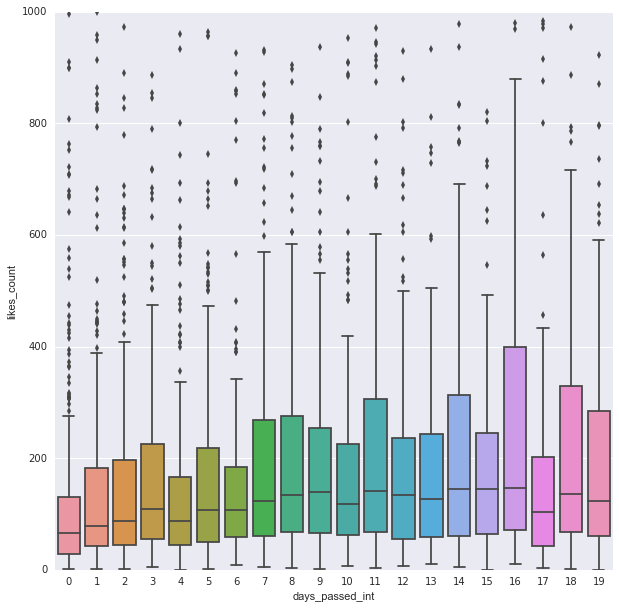

In [101]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='days_passed_int', y='likes_count', data=df)
plt.show()

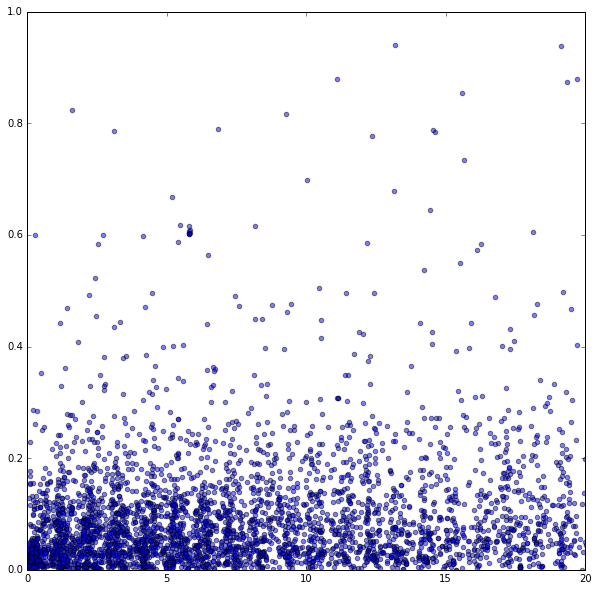

In [62]:
plt.figure(figsize=(10, 10))
plt.scatter(days_passed, likes_density, alpha=0.5)
plt.axis([0, 20, 0, 1])
plt.show()

In [17]:
%matplotlib inline

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os

plt.ion()   # interactive mode


# Data augmentation and normalization for training 
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Scale(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Scale(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './'
batch_size = 4
dsets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
         for x in ['train', 'val']}
dset_loaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=batch_size,
                                               shuffle=True, num_workers=4)
                for x in ['train', 'val']}
dset_sizes = {x: len(dsets[x]) for x in ['train', 'val']}
dset_classes = np.array(dsets['train'].classes)

use_gpu = torch.cuda.is_available()

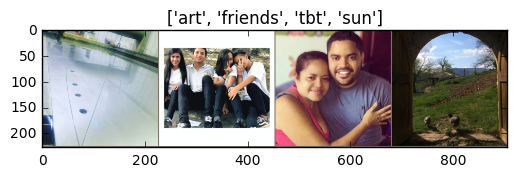

In [18]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dset_loaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[dset_classes[x] for x in classes])

In [25]:
def train_model(model, criterion, optimizer, lr_scheduler, num_epochs=25):
    since = time.time()

    best_model = model
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                optimizer = lr_scheduler(optimizer, epoch)
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.
            running_corrects = 0
            
            batch_loss = 0.
            batch_corrects = 0

            # Iterate over data.
            for i, data in enumerate(dset_loaders[phase]):
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if use_gpu:
                    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)
                
                stat_size = 100
                batch_loss += loss.data[0]
                batch_corrects += torch.sum(preds == labels.data)
                if i % stat_size + 1 == stat_size:
                    print('   ', phase, 
                          batch_loss / stat_size / batch_size, 
                          batch_corrects / stat_size / batch_size)
                    batch_loss = 0
                    batch_corrects = 0

            epoch_loss = running_loss / dset_sizes[phase]
            epoch_acc = running_corrects / dset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            with open('output.log', 'a') as out_file:
                out_file.write('{} Loss: {:.4f} Acc: {:.4f}\n'.format(
                    phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_loss < best_acc:
                best_acc = epoch_loss
                best_model = copy.deepcopy(model)
                with open('model_conv_epoch' + str(epoch), 'wb') as output:
                    pickle.dump(model, output, 2)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    with open('output.log', 'a') as out_file:
        out_file.write('Training complete in {:.0f}m {:.0f}s\n'.format(
            time_elapsed // 60, time_elapsed % 60))
        out_file.write('Best val Acc: {:4f}'.format(best_acc))
    return best_model

def exp_lr_scheduler(optimizer, epoch, init_lr=0.001, lr_decay_epoch=7):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""
    lr = init_lr * (0.1**(epoch // lr_decay_epoch))

    if epoch % lr_decay_epoch == 0:
        print('LR is set to {}'.format(lr))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    return optimizer

def softmax(w):
    e = torch.exp(w)
    dist = e / torch.sum(e)
    return dist

def visualize_model(model, num_images=60):
    images_so_far = 0
    fig = plt.figure(figsize=(20, num_images / 2))

    for i, data in enumerate(dset_loaders['val']):
        if i > 100:
            return
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        sorted_elems, indexes = torch.sort(outputs.data, dim=1, descending=True)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//4, 8, 2 * images_so_far - 1)
            ax.axis('off')
            real_class = dset_classes[labels.data[j]]
            ax.set_title(real_class)            
            imshow(inputs.cpu().data[j])
            
            ax = plt.subplot(num_images//4, 8, 2 * images_so_far)
            objects = dset_classes[indexes[j,:5].cpu().numpy()]
            ax.barh(range(5), softmax(sorted_elems[j,:5]).cpu().numpy(), align='center', alpha=0.5)
            plt.tight_layout()
            plt.gca().invert_yaxis()
            plt.yticks(range(5), objects)
            barlist=filter(lambda x: isinstance(x, matplotlib.patches.Rectangle), ax.get_children())
            for bar_index, bar in enumerate(barlist[:-1]):
                if objects[bar_index] == real_class:
                    bar.set_color('g')
                    break
            ax.set_xlim([0, 1])

            if images_so_far == num_images:
                return

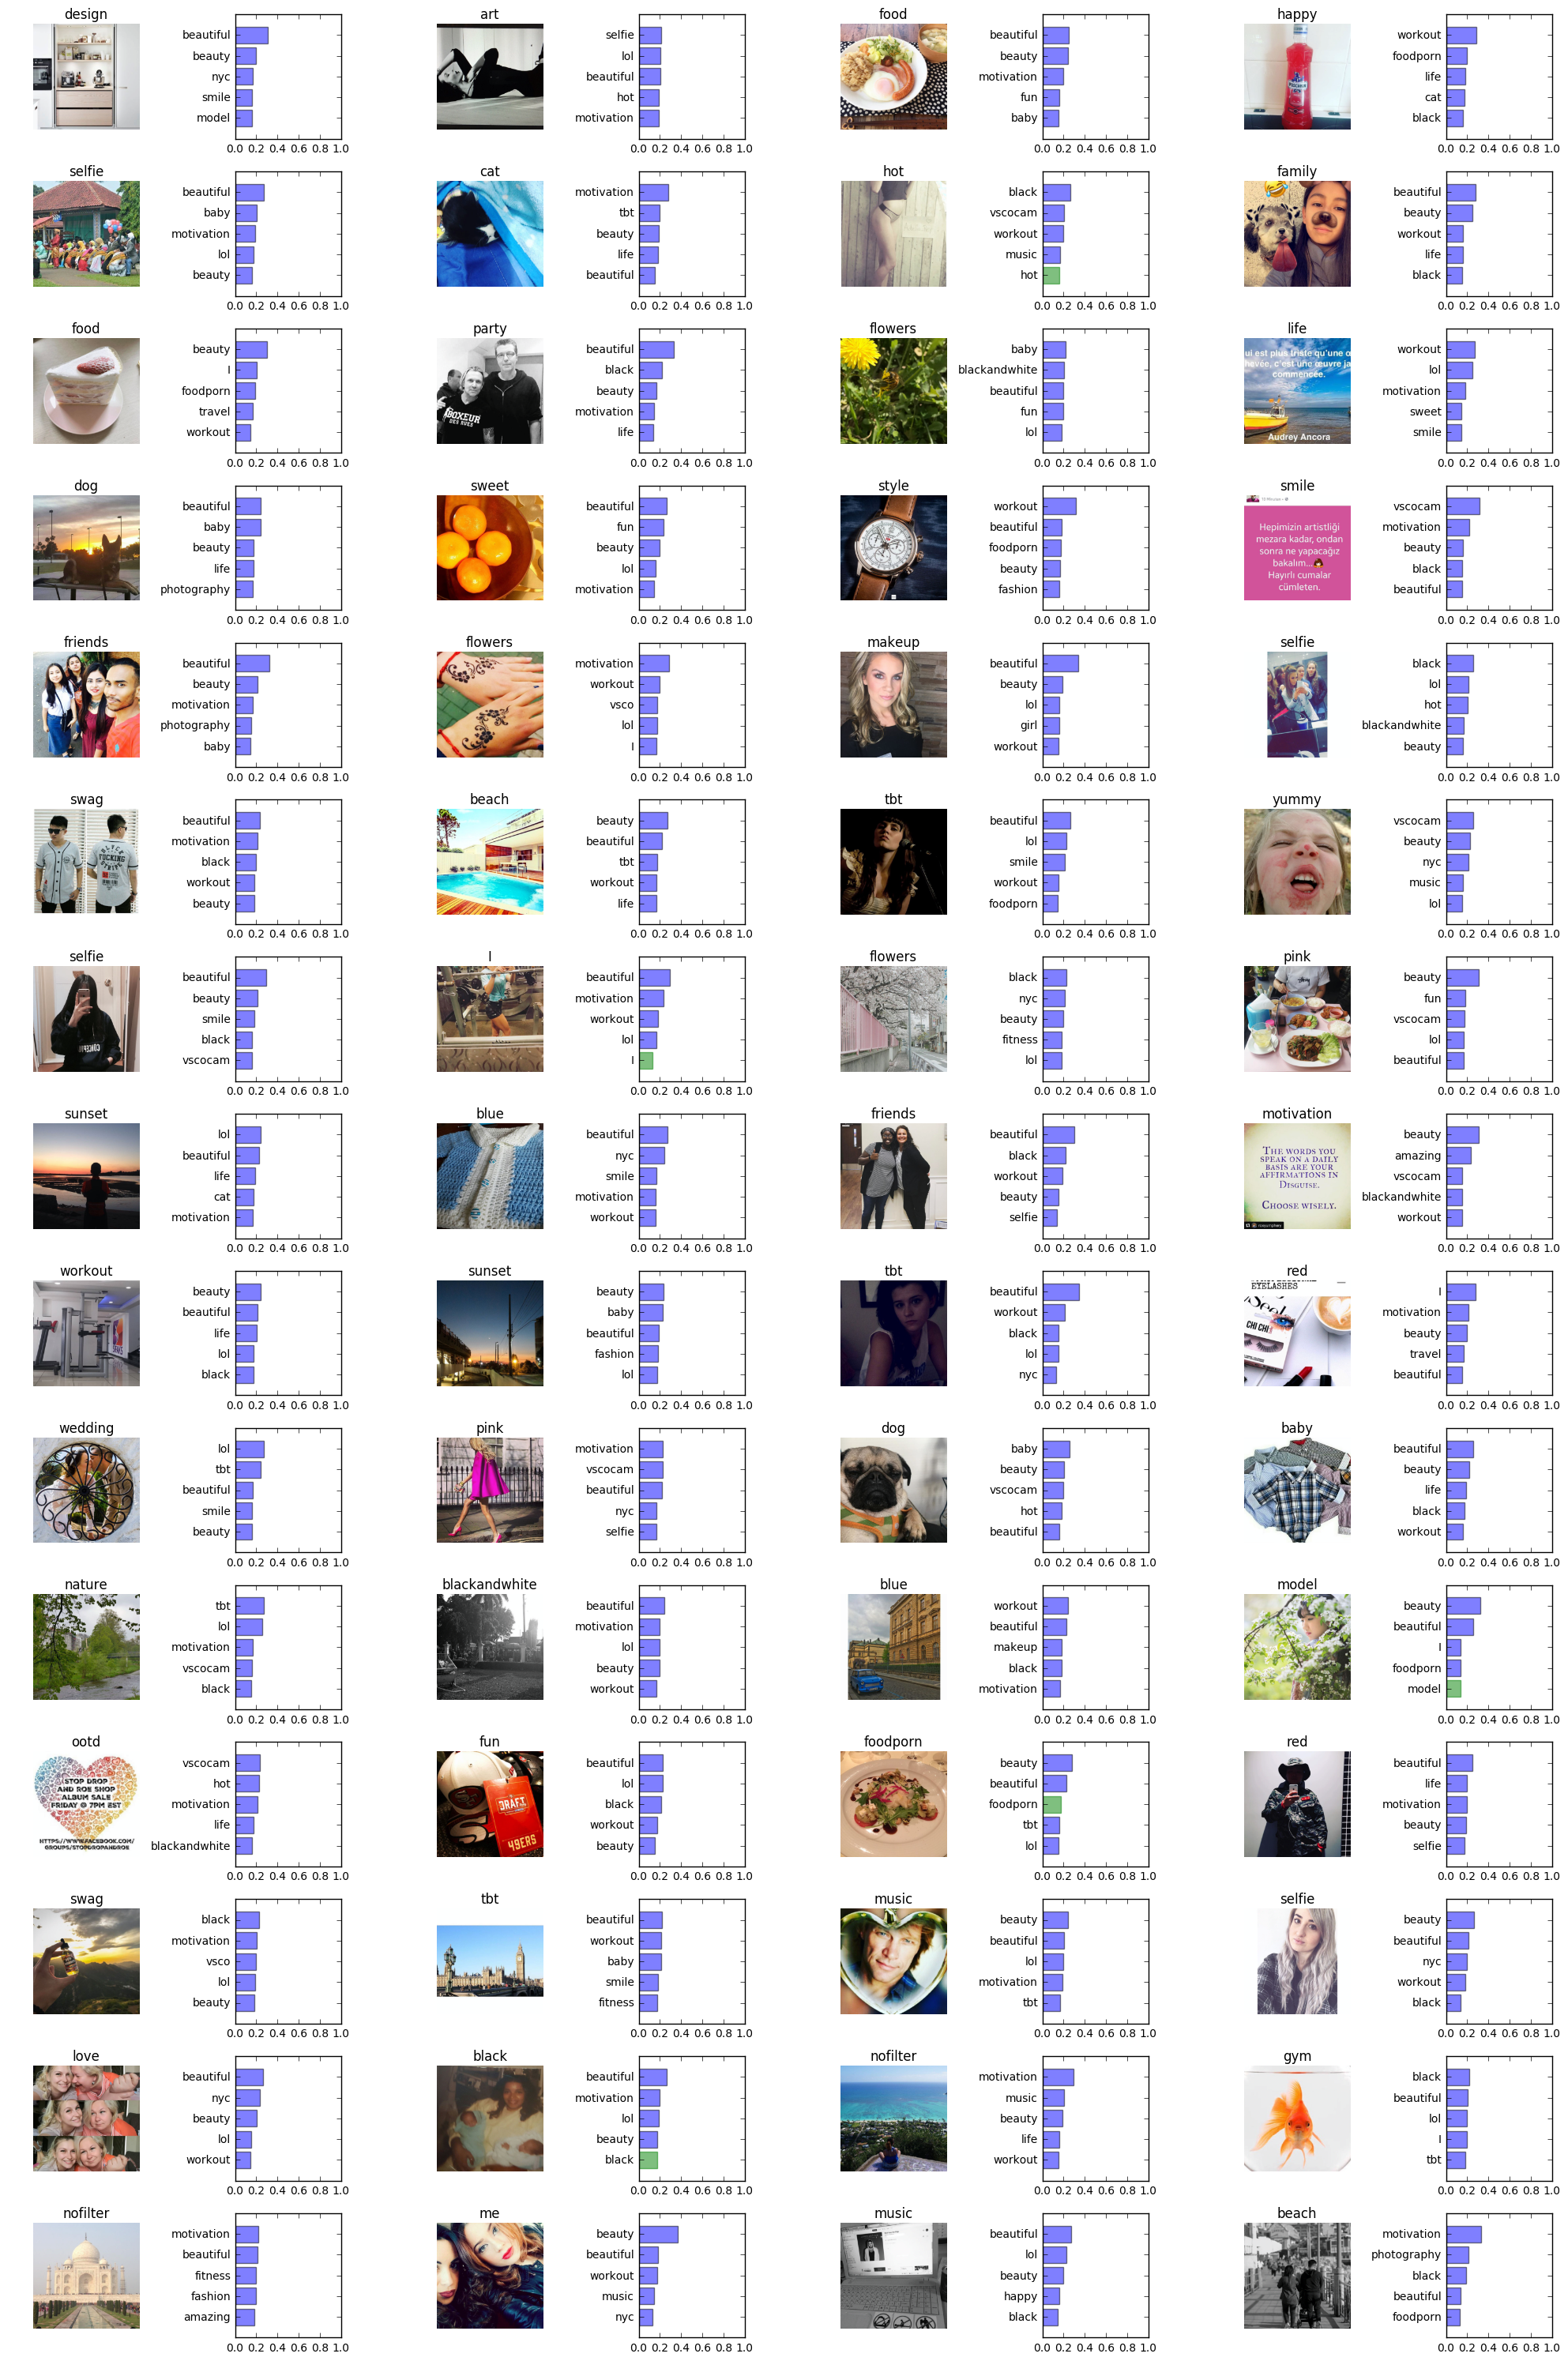

In [23]:
visualize_model(model_conv, 60)

In [20]:
# Set up NN
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(tags_counter_new))

if use_gpu:
    model_conv = model_conv.cuda()

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opoosed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# RUN NN, RUN!
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=1)
with open('model_conv', 'wb') as output:
    pickle.dump(model_conv, output, 2)

Epoch 0/0
----------
LR is set to 0.001
    train 1.05461483896 0.0325
    train 1.0234677732 0.0725
    train 1.02964960992 0.0875
    train 1.01763900578 0.07
    train 0.985399334431 0.1
    train 0.94457244128 0.125
    train 0.961304340363 0.1475
    train 0.961189514995 0.1275
    train 0.958611266613 0.14
    train 0.980249618292 0.11
    train 0.90811095953 0.17
    train 0.941997357607 0.1375
    train 0.938002166748 0.1475
    train 0.928296754956 0.1575
    train 0.922337128222 0.145
    train 0.925032074451 0.135
    train 0.931098300219 0.145
    train 0.945037844479 0.1525
    train 0.94689716965 0.145
    train 0.941352300644 0.15
    train 0.905986986756 0.1575
    train 0.9382602337 0.165
    train 0.922203884721 0.1625
    train 0.933442063928 0.14
    train 0.924556910694 0.13
    train 0.880424017906 0.195
    train 0.900730355382 0.1325
    train 0.921951624453 0.1625
    train 0.896827535033 0.16
    train 0.907215295434 0.1775


In [ ]:
with open('model_conv', 'wb') as output:
    pickle.dump(model_conv, output, 2)